## A comparison of GRNs from biological replicates (TDR118 vs TDR119)

NOTE that they are both from 15-somites stage, 16hpf.

- Author: Yang-Joon Kim
- last updated: 2/29/2024 (with re-sequenced datasets)

## Goals
- (1) comparative analysis on the two GRNs from biological replicates - using the network topology metrics (i.e. degree centrality, etc.)
- (2) [TBD] EDA on other metrics
- (3) [TBD] EDA on the network motifs?

In [1]:
# 0. Import

import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns

In [2]:
import celloracle as co
co.__version__

/home/yang-joon.kim/.conda/envs/celloracle_env/lib/python3.8/site-packages/loompy/bus_file.py:68: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def twobit_to_dna(twobit: int, size: int) -> str:
/home/yang-joon.kim/.conda/envs/celloracle_env/lib/python3.8/site-packages/loompy/bus_file.py:85: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def dna_to_twobit(dna: str

'0.14.0'

In [20]:
# visualization settings
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.rcParams['figure.figsize'] = [6, 4.5]
plt.rcParams["savefig.dpi"] = 600

In [21]:
import logging

# Set the logging level to WARN, filtering out informational messages
logging.getLogger().setLevel(logging.WARNING)

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) #Reset rcParams to default

# Set the default font to Arial
mpl.rcParams['font.family'] = 'Arial'

# If Arial is not available on your system, you might need to specify an alternative or ensure Arial is installed.
# On some systems, you might need to use 'font.sans-serif' as a fallback option:
# mpl.rcParams['font.sans-serif'] = 'Arial'

# Editable text and proper LaTeX fonts in illustrator
# matplotlib.rcParams['ps.useafm'] = True
# Editable fonts. 42 is the magic number for editable text in PDFs
mpl.rcParams['pdf.fonttype'] = 42
sns.set(style='whitegrid', context='paper')

# Plotting style function (run this before plotting the final figure)
def set_plotting_style():
    plt.style.use('seaborn-paper')
    plt.rc('axes', labelsize=12)
    plt.rc('axes', titlesize=12)
    plt.rc('xtick', labelsize=10)
    plt.rc('ytick', labelsize=10)
    plt.rc('legend', fontsize=10)
    plt.rc('text.latex', preamble=r'\usepackage{sfmath}')
    plt.rc('xtick.major', pad=2)
    plt.rc('ytick.major', pad=2)
    plt.rc('mathtext', fontset='stixsans', sf='sansserif')
    plt.rc('figure', figsize=[10,9])
    plt.rc('svg', fonttype='none')

    # Override any previously set font settings to ensure Arial is used
    plt.rc('font', family='Arial')

In [18]:
set_plotting_style()

In [4]:
# define the figure paths
figpath = "/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/zebrahub-multiome-analysis/figures/GRN_benchmark_TDR118_TDR119_peaks_merged/"
os.makedirs(figpath, exist_ok=True)

## Step 1. Import the GRN (Links object)

In [5]:
# import the GRNs (Links objects)
TDR118_GRN = co.load_hdf5("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/03_celloracle_celltype_GRNs/TDR118reseq/08_TDR118reseq_celltype_GRNs.celloracle.links")
TDR119_GRN = co.load_hdf5("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/03_celloracle_celltype_GRNs/TDR119reseq/08_TDR119reseq_celltype_GRNs.celloracle.links")


In [6]:
# syntax to explore the Links objects (GRNs)
TDR118_GRN.filtered_links["NMPs"].value_counts()

source  target     coef_mean  coef_abs  p             -logp    
alx1    cdh6        0.019700  0.019700  3.915558e-11  10.407206    1
pitx2   unc5b       0.018978  0.018978  3.343465e-13  12.475803    1
pnx     col11a1a   -0.013780  0.013780  2.767923e-09  8.557846     1
pknox2  zeb2a       0.024373  0.024373  2.276592e-07  6.642715     1
        zbtb16a     0.029235  0.029235  1.139034e-13  12.943463    1
                                                                  ..
hoxd3a  serpinh1b   0.014820  0.014820  6.622221e-13  12.178996    1
        robo3       0.014896  0.014896  1.218928e-13  12.914022    1
        robo1       0.028820  0.028820  3.732951e-15  14.427948    1
        rarga       0.015032  0.015032  8.377972e-14  13.076861    1
zic2b   sox6       -0.020696  0.020696  2.698394e-10  9.568895     1
Length: 2000, dtype: int64

In [7]:
# syntax to explore the Links objects (GRNs)
TDR118_GRN.filtered_links["NMPs"].value_counts()

source  target     coef_mean  coef_abs  p             -logp    
alx1    cdh6        0.019700  0.019700  3.915558e-11  10.407206    1
pitx2   unc5b       0.018978  0.018978  3.343465e-13  12.475803    1
pnx     col11a1a   -0.013780  0.013780  2.767923e-09  8.557846     1
pknox2  zeb2a       0.024373  0.024373  2.276592e-07  6.642715     1
        zbtb16a     0.029235  0.029235  1.139034e-13  12.943463    1
                                                                  ..
hoxd3a  serpinh1b   0.014820  0.014820  6.622221e-13  12.178996    1
        robo3       0.014896  0.014896  1.218928e-13  12.914022    1
        robo1       0.028820  0.028820  3.732951e-15  14.427948    1
        rarga       0.015032  0.015032  8.377972e-14  13.076861    1
zic2b   sox6       -0.020696  0.020696  2.698394e-10  9.568895     1
Length: 2000, dtype: int64

In [8]:
# extract the network topology scores (i.e. degree_centrality_all)
df_GRN1 = TDR118_GRN.merged_score
df_GRN2 = TDR119_GRN.merged_score

In [9]:
df_GRN1.cluster.unique()

array(['Adaxial_Cells', 'Differentiating_Neurons', 'Endoderm',
       'Epidermal', 'Lateral_Mesoderm', 'Muscle', 'NMPs',
       'Neural_Anterior', 'Neural_Crest', 'Neural_Posterior', 'Notochord',
       'PSM', 'Somites', 'unassigned'], dtype=object)

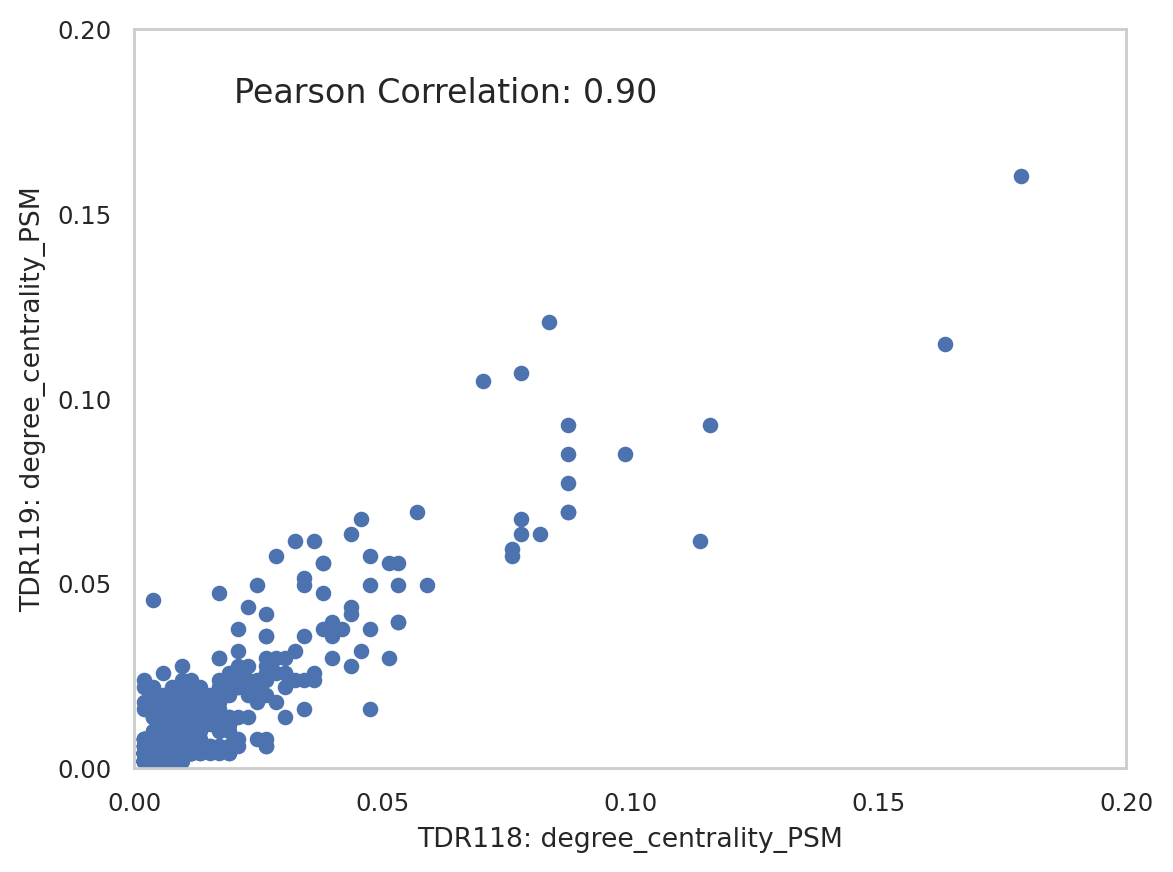

In [27]:
# Check the correlation of "degree_centrality_all" metric 
# per gene between the same cell-types

# subset the dataframes for specific cell-type
celltype1 = "PSM"
celltype2 = "PSM"

df1 = df_GRN1[df_GRN1.cluster==celltype1]
df2 = df_GRN2[df_GRN2.cluster==celltype2]

# Step 1. Get a union of gene_names
gene_names = set(df1.index).union(df2.index)
len(gene_names)

# Step 2. Create a new dataframe with matching indices
new_df1 = df1[df1.index.isin(gene_names)]
new_df2 = df2[df2.index.isin(gene_names)]

# Step 3. Fill missing values with NaNs
new_df1 = new_df1.reindex(gene_names) #fill_value=0
new_df2 = new_df2.reindex(gene_names)

# Step 4. Create the zipped DataFrame
zipped_df = pd.DataFrame({'degree_centrality_all_df1': new_df1['degree_centrality_all'], 'degree_centrality_all_df2': new_df2['degree_centrality_all']})
zipped_df

# Step 5. Generate scatter plots, with Pearson correlation coeff.
plt.scatter(x=zipped_df.degree_centrality_all_df1,
            y=zipped_df.degree_centrality_all_df2)
plt.xlabel("TDR118: degree_centrality_" + celltype1)
plt.ylabel("TDR119: degree_centrality_" + celltype2)
plt.xlim([0, 0.2])
plt.ylim([0, 0.2])
plt.xticks([0, 0.05, 0.1, 0.15, 0.2])
plt.yticks([0, 0.05, 0.1, 0.15, 0.2])
#plt.title("degree_centrality (gene)")
plt.grid(False)  # Disables gridlines for this plot


# Annotate the plot with the correlation coefficient
corr = zipped_df.degree_centrality_all_df1.corr(zipped_df.degree_centrality_all_df2,
                                                method = "pearson")
plt.annotate(f"Pearson Correlation: {corr:.2f}",
             xy=(0.1, 0.9), xycoords='axes fraction', fontsize=12)

plt.savefig(figpath + "scatter_degree_centrality_TDR118_TDR119_PSM.pdf")
plt.savefig(figpath + "scatter_degree_centrality_TDR118_TDR119_PSM.png")

plt.show()

In [32]:
zipped_df.sort_values("degree_centrality_all_df1", ascending=False)

,degree_centrality_all_df1,degree_centrality_all_df2
meox1,0.178707,0.160079
meis1b,0.163498,0.114625
rxraa,0.115970,0.092885
mef2d,0.114068,0.061265
meis1a,0.098859,0.084980
...,...,...
kif20a,NaN,0.001976
adcy2b,NaN,0.001976
shox,NaN,0.011858
draxin,NaN,0.039526


In [37]:
df_GRN1.cluster.unique()

array(['Adaxial_Cells', 'Differentiating_Neurons', 'Endoderm',
       'Epidermal', 'Lateral_Mesoderm', 'Muscle', 'NMPs',
       'Neural_Anterior', 'Neural_Crest', 'Neural_Posterior', 'Notochord',
       'PSM', 'Somites', 'unassigned'], dtype=object)

### Same embryo - different celltypes

- this is to see the correlation between different celltypes within the same embryo


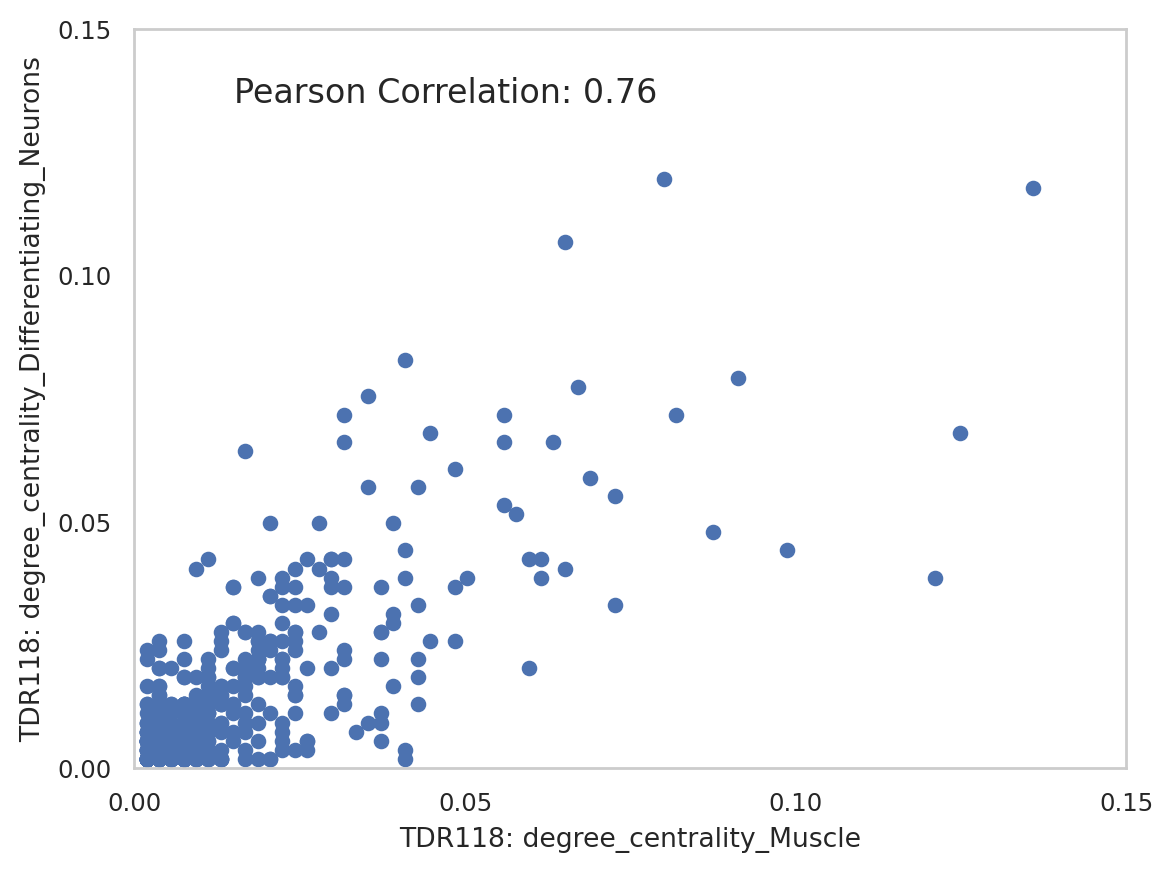

In [59]:
# Check the correlation of "degree_centrality_all" metric 
# per gene between different cell-types

# subset the dataframes for specific cell-type
celltype1 = "Muscle"
celltype2 = "Differentiating_Neurons"

# sample from the TDR118reseq (df_GRN1)
df1 = df_GRN1[df_GRN1.cluster==celltype1]
df2 = df_GRN1[df_GRN1.cluster==celltype2]

# Step 1. Get a union of gene_names
gene_names = set(df1.index).union(df2.index)
len(gene_names)

# Step 2. Create a new dataframe with matching indices
new_df1 = df1[df1.index.isin(gene_names)]
new_df2 = df2[df2.index.isin(gene_names)]

# Step 3. Fill missing values with 0
new_df1 = new_df1.reindex(gene_names) #fill_value=0
new_df2 = new_df2.reindex(gene_names)

# Step 4. Create the zipped DataFrame
zipped_df = pd.DataFrame({'degree_centrality_all_df1': new_df1['degree_centrality_all'], 'degree_centrality_all_df2': new_df2['degree_centrality_all']})
zipped_df

# Step 5. Generate scatter plots, with Pearson correlation coeff.
plt.scatter(x=zipped_df.degree_centrality_all_df1,
            y=zipped_df.degree_centrality_all_df2)
plt.xlabel("TDR118: degree_centrality_" + celltype1)
plt.ylabel("TDR118: degree_centrality_" + celltype2)
# plt.title("degree_centrality (gene)")
plt.xlim([0, 0.15])
plt.ylim([0, 0.15])
plt.xticks([0, 0.05, 0.1, 0.15])
plt.yticks([0, 0.05, 0.1, 0.15])

plt.grid(False)

# Annotate the plot with the correlation coefficient
corr = zipped_df.degree_centrality_all_df1.corr(zipped_df.degree_centrality_all_df2,
                                                method = "pearson")
plt.annotate(f"Pearson Correlation: {corr:.2f}",
             xy=(0.1, 0.9), xycoords='axes fraction', fontsize=12)

plt.savefig(figpath + "scatter_degree_centrality_TDR118_Muscle_Diff_Neurons.pdf")
plt.savefig(figpath + "scatter_degree_centrality_TDR118_Muscle_Diff_Neurons.png")

plt.show()

### Check the correlation between different celltypes from two biological replicates

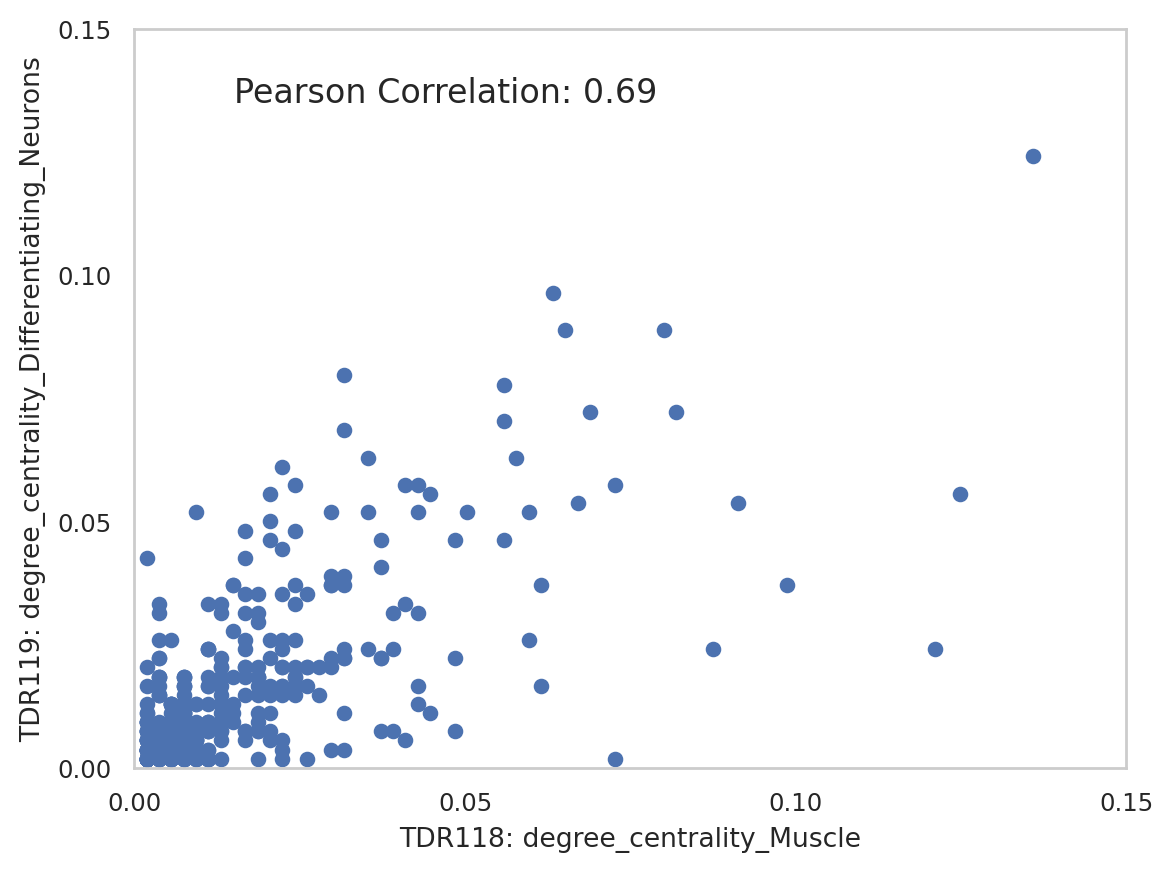

In [51]:
# Check the correlation of "degree_centrality_all" metric 
# per gene between different cell-types

# subset the dataframes for specific cell-type
celltype1 = "Muscle"
celltype2 = "Differentiating_Neurons"

df1 = df_GRN1[df_GRN1.cluster==celltype1]
df2 = df_GRN2[df_GRN2.cluster==celltype2]

# Step 1. Get a union of gene_names
gene_names = set(df1.index).union(df2.index)
len(gene_names)

# Step 2. Create a new dataframe with matching indices
new_df1 = df1[df1.index.isin(gene_names)]
new_df2 = df2[df2.index.isin(gene_names)]

# Step 3. Fill missing values with 0
new_df1 = new_df1.reindex(gene_names) #fill_value=0
new_df2 = new_df2.reindex(gene_names)

# Step 4. Create the zipped DataFrame
zipped_df = pd.DataFrame({'degree_centrality_all_df1': new_df1['degree_centrality_all'], 'degree_centrality_all_df2': new_df2['degree_centrality_all']})
zipped_df

# Step 5. Generate scatter plots, with Pearson correlation coeff.
plt.scatter(x=zipped_df.degree_centrality_all_df1,
            y=zipped_df.degree_centrality_all_df2)
plt.xlabel("TDR118: degree_centrality_" + celltype1)
plt.ylabel("TDR119: degree_centrality_" + celltype2)
# plt.title("degree_centrality (gene)")
plt.xlim([0, 0.15])
plt.ylim([0, 0.15])
plt.xticks([0, 0.05, 0.1, 0.15])
plt.yticks([0, 0.05, 0.1, 0.15])

plt.grid(False)

# Annotate the plot with the correlation coefficient
corr = zipped_df.degree_centrality_all_df1.corr(zipped_df.degree_centrality_all_df2,
                                                method = "pearson")
plt.annotate(f"Pearson Correlation: {corr:.2f}",
             xy=(0.1, 0.9), xycoords='axes fraction', fontsize=12)

plt.savefig(figpath + "scatter_degree_centrality_TDR118_Muscle_TDR119_Diff_Neurons.pdf")
plt.savefig(figpath + "scatter_degree_centrality_TDR118_Muscle_TDR119_Diff_Neurons.png")

plt.show()

In [49]:
zipped_df.sort_values("degree_centrality_all_df1", ascending=False)

,degree_centrality_all_df1,degree_centrality_all_df2
meis1b,0.135940,0.124074
meis1a,0.124767,0.055556
meox1,0.121043,0.024074
sox6,0.098696,0.037037
nr2f5,0.091248,0.053704
...,...,...
wnt11,NaN,0.003704
elavl3,NaN,0.005556
draxin,NaN,0.024074
wnt5b,NaN,0.007407


In [50]:
zipped_df.sort_values("degree_centrality_all_df2", ascending=False)

,degree_centrality_all_df1,degree_centrality_all_df2
meis1b,0.135940,0.124074
hmga1a,0.063315,0.096296
sox13,0.080074,0.088889
foxp4,0.065177,0.088889
irx1b,0.031657,0.079630
...,...,...
gfi1b,0.003724,NaN
mnx2a,0.003724,NaN
crip2,0.005587,NaN
zgc:158328,0.014898,NaN


## Step 2. Compute the correlation coefficients between the same cell-types and different cell-types

- correlation coefficients of different network metrics (across all genes, that are present in both GRNs - two biological replicates)

In [81]:
# define a function to compute the correlation of network_metrics (per gene) between two GRNs
# GRN1, GRN2: two GRNs (filtered Links object)
# celltype1, celltype2: cell-types
# network_metric: network topology metrics, i.e. degree_centrality_all

def compute_corr_betwn_GRNs(df_GRN1, df_GRN2, celltype1, celltype2, network_metric):
    df1 = df_GRN1[df_GRN1.cluster==celltype1]
    df2 = df_GRN2[df_GRN2.cluster==celltype2]

    # Step 1. Get a union of gene_names
    gene_names = set(df1.index).union(df2.index)
    len(gene_names)

    # Step 2. Create a new dataframe with matching indices
    new_df1 = df1[df1.index.isin(gene_names)]
    new_df2 = df2[df2.index.isin(gene_names)]

    # Step 3. Fill missing values with NaNs
    new_df1 = new_df1.reindex(gene_names) #fill_value=0
    new_df2 = new_df2.reindex(gene_names)

    # Step 4. Create the zipped DataFrame
    zipped_df = pd.DataFrame({'metric_df1': new_df1[network_metric], 'metric_df2': new_df2[network_metric]})
    zipped_df

#     # Step 5. Generate scatter plots, with Pearson correlation coeff.
#     plt.scatter(x=zipped_df.metric_df1,
#                 y=zipped_df.metric_df2)
#     plt.xlabel("TDR118: "+ network_metric + "_" + celltype1)
#     plt.ylabel("TDR119: "+ network_metric + "_" + celltype2)
#     plt.title(network_metric)


    # Annotate the plot with the correlation coefficient
    corr = zipped_df.metric_df1.corr(zipped_df.metric_df2,
                                    method = "pearson")
    return corr

### Step 2-1. degree_centrality_all

- This metric was used by Kamimoto et al., Cell Stem Cell, 2023. So, we will use this metric as our first-pass metric to compare the two GRNs.

In [74]:
# define the cell-types
# celltypes = ['Adaxial_Cells', 'Differentiating_Neurons', 'Endoderm',
#        'Epidermal', 'Lateral_Mesoderm', 'Muscle', 'NMPs',
#        'Neural_Anterior', 'Neural_Crest', 'Neural_Posterior', 'Notochord',
#        'PSM', 'Somites', 'unassigned']
celltypes = ['Adaxial_Cells', 'Differentiating_Neurons', 'Endoderm',
       'Epidermal', 'Lateral_Mesoderm', 'Muscle', 'NMPs',
       'Neural_Anterior', 'Neural_Crest', 'Neural_Posterior', 'Notochord',
       'PSM', 'Somites']

# define empty series to save the correlation coefficients
corr_same_celltypes =[]
corr_diff_celltypes = []


for ct1 in celltypes:
    for ct2 in celltypes:
        corr_coeff = compute_corr_betwn_GRNs(df_GRN1, df_GRN2, ct1, ct2, "degree_centrality_all")
        
        if ct1==ct2:
            corr_same_celltypes.append(corr_coeff)
        else:
            corr_diff_celltypes.append(corr_coeff)

In [80]:
# define the bin width
bin_width = 0.025

# Calculate the number of bins for each histogram
num_bins1 = int((max(corr_same_celltypes) - min(corr_same_celltypes)) / bin_width)
num_bins2 = int((max(corr_diff_celltypes) - min(corr_diff_celltypes)) / bin_width)

plt.figure()
sns.histplot(corr_same_celltypes, kde=True, bins=num_bins1, stat="count", label='same_celltypes', alpha=0.5)
sns.histplot(corr_diff_celltypes, kde=True, bins=num_bins2, stat="count", label='diff_celltypes', alpha=0.5)
# plt.hist(corr_same_celltypes, density=True, bins=num_bins1)
# plt.hist(corr_diff_celltypes, density=True, bins=num_bins2)
plt.xlim([0.2, 1])
plt.xlabel("Pearson correlation: GRN1/GRN2")
plt.ylabel("density")
plt.title("degree_centrality_all")
plt.legend()
plt.grid(False)

#plt.savefig("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/zebrahub-multiome-analysis/figures/network_plots_TDR118/QC_corr_centrality_TDR118_TDR119_allCelltypes.pdf")
# plt.savefig(figpath + "QC_corr_centrality_all_TDR118_TDR119_allCelltypes.pdf")
# plt.savefig(figpath + "QC_corr_centrality_all_TDR118_TDR119_allCelltypes.png")
plt.show()

ValueError: cannot convert float NaN to integer

### Notochord is one of the worse correlation coeff. Let's examine this

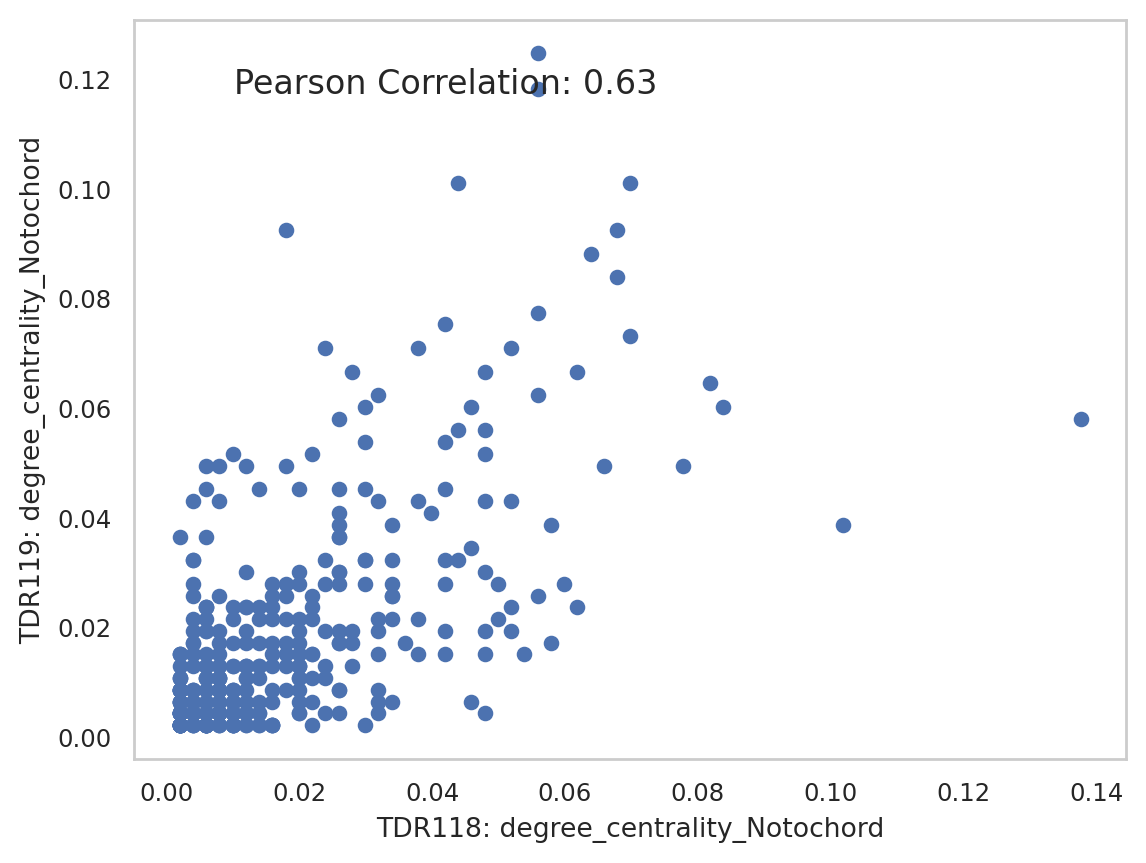

In [62]:
# Check the correlation of "degree_centrality_all" metric 
# per gene between different cell-types

# subset the dataframes for specific cell-type
celltype1 = "Notochord"
celltype2 = "Notochord"

df1 = df_GRN1[df_GRN1.cluster==celltype1]
df2 = df_GRN2[df_GRN2.cluster==celltype2]

# Step 1. Get a union of gene_names
gene_names = set(df1.index).union(df2.index)
len(gene_names)

# Step 2. Create a new dataframe with matching indices
new_df1 = df1[df1.index.isin(gene_names)]
new_df2 = df2[df2.index.isin(gene_names)]

# Step 3. Fill missing values with 0
new_df1 = new_df1.reindex(gene_names) #fill_value=0
new_df2 = new_df2.reindex(gene_names)

# Step 4. Create the zipped DataFrame
zipped_df = pd.DataFrame({'degree_centrality_all_df1': new_df1['degree_centrality_all'], 'degree_centrality_all_df2': new_df2['degree_centrality_all']})
zipped_df

# Step 5. Generate scatter plots, with Pearson correlation coeff.
plt.scatter(x=zipped_df.degree_centrality_all_df1,
            y=zipped_df.degree_centrality_all_df2)
plt.xlabel("TDR118: degree_centrality_" + celltype1)
plt.ylabel("TDR119: degree_centrality_" + celltype2)
# plt.title("degree_centrality (gene)")
plt.grid(False)


# Annotate the plot with the correlation coefficient
corr = zipped_df.degree_centrality_all_df1.corr(zipped_df.degree_centrality_all_df2,
                                                method = "pearson")
plt.annotate(f"Pearson Correlation: {corr:.2f}",
             xy=(0.1, 0.9), xycoords='axes fraction', fontsize=12)

plt.show()

In [64]:
zipped_df.sort_values("degree_centrality_all_df1", ascending=False)

,degree_centrality_all_df1,degree_centrality_all_df2
meis1b,0.137725,0.058065
irx1b,0.101796,0.038710
sox13,0.083832,0.060215
irx3a,0.081836,0.064516
foxp4,0.077844,0.049462
...,...,...
vcana,NaN,0.002151
nkx6.2,NaN,0.006452
pak2a,NaN,0.004301
draxin,NaN,0.012903


In [65]:
zipped_df.sort_values("degree_centrality_all_df2", ascending=False)

,degree_centrality_all_df1,degree_centrality_all_df2
hmga1a,0.055888,0.124731
irx7,0.055888,0.118280
arxb,0.043912,0.101075
rarga,0.069860,0.101075
cirbpa,0.017964,0.092473
...,...,...
negr1,0.007984,NaN
gata4,0.013972,NaN
ptprga,0.001996,NaN
col4a5,0.003992,NaN


### Step 2.2 Other degree metrics

- degree_all
- degree_in
- degree_out
- degree_centrality_all (used above)
- degree_centrality_in
- degree_centrality_out
- eigenvector_centrality

In [75]:
# define a dictionary to save all the corr.coeff results
dict_corr_coeff = {}
dict_corr_coeff["degree_centrality_all_same"] = corr_same_celltypes
dict_corr_coeff['degree_centrality_all_diff'] = corr_diff_celltypes

In [76]:
# define the cell-types
celltypes = ['Adaxial_Cells', 'Differentiating_Neurons', 'Endoderm',
       'Epidermal', 'Lateral_Mesoderm', 'Muscle', 'NMPs',
       'Neural_Anterior', 'Neural_Crest', 'Neural_Posterior', 'Notochord',
       'PSM', 'Somites']

# define the degree_metrics
degree_metrics = ["degree_all","degree_in","degree_out",
                  "degree_centrality_all","degree_centrality_in",
                  "degree_centrality_out","eigenvector_centrality"]

# define an empty dictionary to save the list of corr.coeff (per metric)
dict_corr_coeff = {}
# dict_corr_coeff["degree_centrality_all_same"] = corr_same_celltypes
# dict_corr_coeff['degree_centrality_all_diff'] = corr_diff_celltypes

# For loop to go over all degree metrics
for metric in degree_metrics:
    # define empty series to save the correlation coefficients
    corr_same_celltypes =[]
    corr_diff_celltypes = []

    for ct1 in celltypes:
        for ct2 in celltypes:
            corr_coeff = compute_corr_betwn_GRNs(df_GRN1, df_GRN2, ct1, ct2, metric)

            if ct1==ct2:
                corr_same_celltypes.append(corr_coeff)
            else:
                corr_diff_celltypes.append(corr_coeff)
                
    # define the keys for the dictionary
    namekey_same = metric + "_same"
    namekey_diff = metric + "_diff"
    # save the corr.coeff. into the dictionary
    dict_corr_coeff[namekey_same] = corr_same_celltypes
    dict_corr_coeff[namekey_diff] = corr_diff_celltypes
    
    # generate plots (optional)
    # define the bin width
    bin_width = 0.025

    # Calculate the number of bins for each histogram
    num_bins1 = int((max(corr_same_celltypes) - min(corr_same_celltypes)) / bin_width)
    num_bins2 = int((max(corr_diff_celltypes) - min(corr_diff_celltypes)) / bin_width)

    plt.figure()
    sns.histplot(corr_same_celltypes, kde=True, bins=num_bins1, stat="density", label='same_celltypes')
    sns.histplot(corr_diff_celltypes, kde=True, bins=num_bins2, stat="density", label='diff_celltypes')
    plt.xlim([0.2, 1])
    plt.xlabel("Pearson correlation: GRN1/GRN2")
    plt.ylabel("density")
    plt.title(metric)
    plt.grid(False)
    plt.legend()

    plt.savefig(figpath + "QC_corr_" + metric + "_TDR118_TDR119_allCelltypes.pdf")
    plt.savefig(figpath + "QC_corr_" + metric + "_TDR118_TDR119_allCelltypes.png")
    plt.show()

ValueError: cannot convert float NaN to integer

### Step 3. generate a boxplot showing the corr.coeff distribution for same/diff cell-types, for different metrics



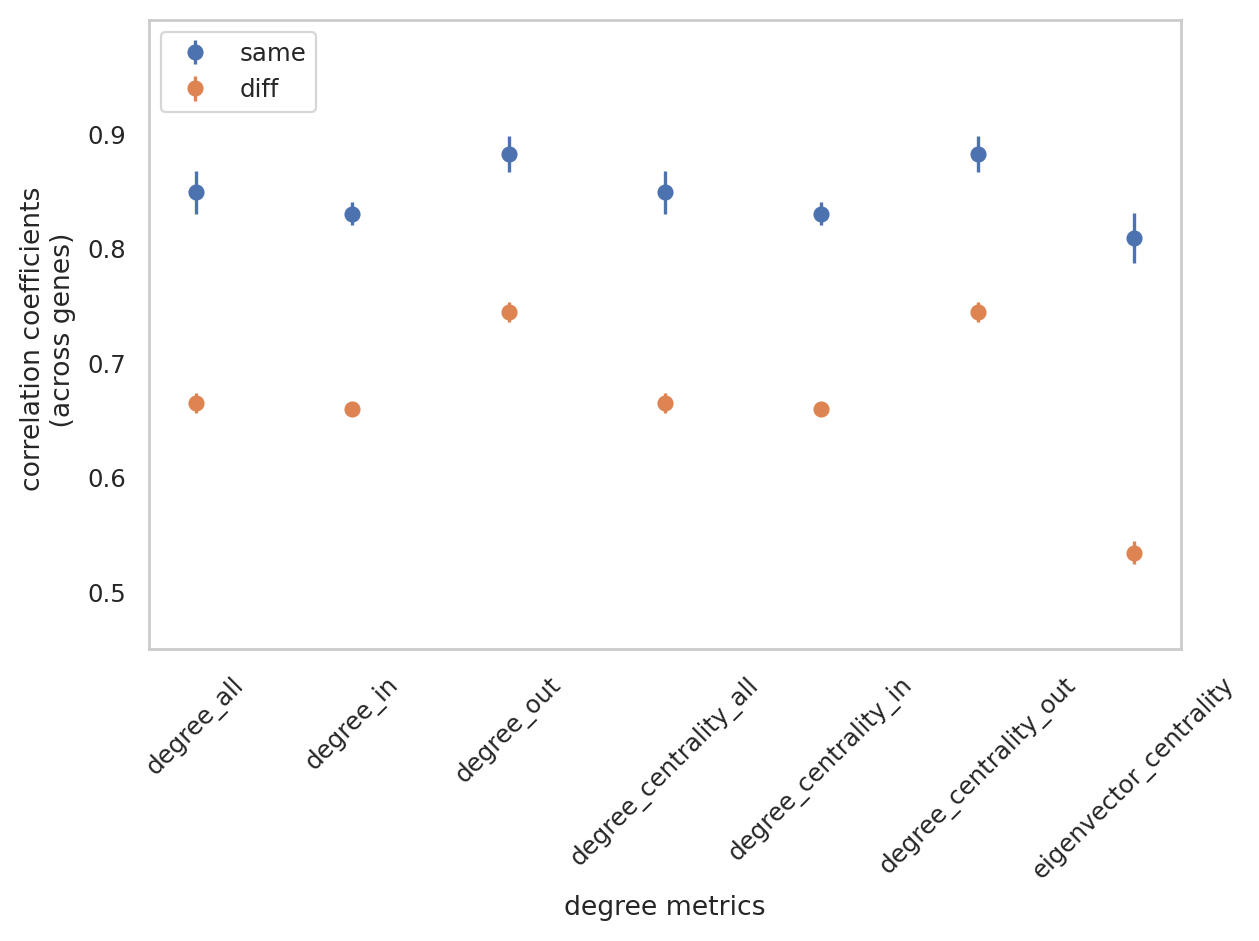

In [58]:
# A dictionary that has the distributions of corr.coeff., from all metrics
data = dict_corr_coeff
metric_names = degree_metrics

# Extract metric names and categories
# metric_names = list(set(key.split('_')[0] for key in data.keys()))
categories = ['same', 'diff']

# Compute means and standard errors for each metric and category
means = {}
std_errors = {}
for metric in metric_names:
    means[metric] = [np.mean(data[f'{metric}_{category}']) for category in categories]
    std_errors[metric] = [np.std(data[f'{metric}_{category}']) / np.sqrt(len(data[f'{metric}_{category}'])) for category in categories]

# Create x-values for each metric
x_values = np.arange(len(metric_names))

# Create a scatter plot with grouped data points and error bars
fig, ax = plt.subplots()

for i, category in enumerate(categories):
    y_values = [np.mean(data[f'{metric}_{category}']) for metric in metric_names]
    error_bar = [np.std(data[f'{metric}_{category}']) / np.sqrt(len(data[f'{metric}_{category}'])) for metric in metric_names]
    ax.errorbar(x_values, y_values, yerr=error_bar, marker='o', linestyle='None', label=category)

ax.set_xlabel('degree metrics')
ax.set_ylabel('correlation coefficients \n (across genes)')
# ax.set_title('Mean Value with Standard Error (Grouped Scatter Plot with Error Bars)')
ax.set_xticks(x_values)
ax.set_yticks([0.5, 0.6, 0.7, 0.8, 0.9])
ax.set_ylim([0.45, 1])
ax.set_xticklabels(metric_names, rotation = 45)
ax.legend(loc="upper left")
ax.grid(False)

plt.tight_layout()
plt.savefig(figpath + "corr_coeff_all_degree_metrics_scatter.pdf")
plt.savefig(figpath + "corr_coeff_all_degree_metrics_scatter.png")
plt.show()

## NOTES (updated as of 2/29/2024)

- The correlation became worse than the pilot study, possibly because we are now recovering more accurate GRNs. The difference from this round of datasets (re-sequenced) and the previous round is the following:
    - (1) since we did re-sequencing (for deeper sequencing depth), lowly expressed genes would be recovered (i.e. myf5).
    - (2) the GRNs were re-computed from "peaks_merged", which are narrower than the Cellranger-arc called peaks.


## Comparison between two timepoints

Next, we wanted to see how variable the GRNs are across the timepoints. For this, we wanted to compare two timepoints.
There are many ways that we can pick the pairs of (t1, t2), but we can start with the folloiwngs.

- 1) (15 somites, 0 somites) = (TDR118, TDR126): mid and early timepoints. This way, we can see the variability between biological replicates and different timepoints.
- 2) (15 somites, 30 somites) = (TDR118, TDR124): mid and late timepoints. This way, we can see the variability between biological replicates and different timepoints.
- 3) (0 somites, 30 somites) = (TDR126, TDR124): early and late timepoints.


In [67]:
# TDR126 (10hpf, 0 somites = budstage)
TDR126_GRN = co.load_hdf5("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/03_celloracle_celltype_GRNs/TDR126/08_TDR126_celltype_GRNs.celloracle.links")

# TDR124 (24hpf, 30 somites)
TDR124_GRN = co.load_hdf5("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/03_celloracle_celltype_GRNs/TDR124reseq/08_TDR124reseq_celltype_GRNs.celloracle.links")

In [68]:
# First, (15 somites, 0 somites) = (TDR118, TDR126)
df_GRN1 = TDR118_GRN.merged_score
df_GRN2 = TDR126_GRN.merged_score

In [69]:
# define a dictionary to save all the corr.coeff results
dict_corr_coeff = {}
dict_corr_coeff["degree_centrality_all_same"] = corr_same_celltypes
dict_corr_coeff['degree_centrality_all_diff'] = corr_diff_celltypes

In [67]:
celltypes = set(TDR126_GRN.links_dict.keys()).intersection(TDR118_GRN.links_dict.keys())
celltypes.remove("unassigned")
celltypes

{'Differentiating_Neurons',
 'Endoderm',
 'Epidermal',
 'Lateral_Mesoderm',
 'Muscle',
 'NMPs',
 'Neural_Anterior',
 'Neural_Crest',
 'Neural_Posterior',
 'Notochord',
 'PSM',
 'Somites'}

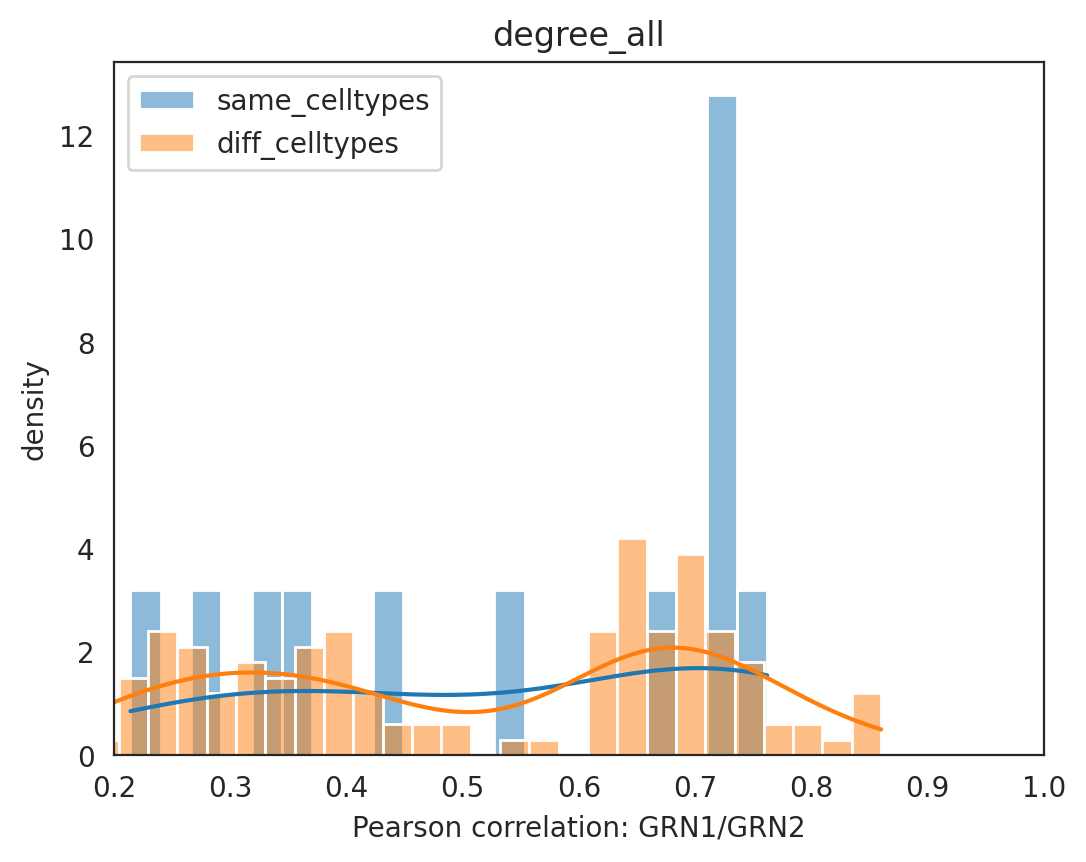

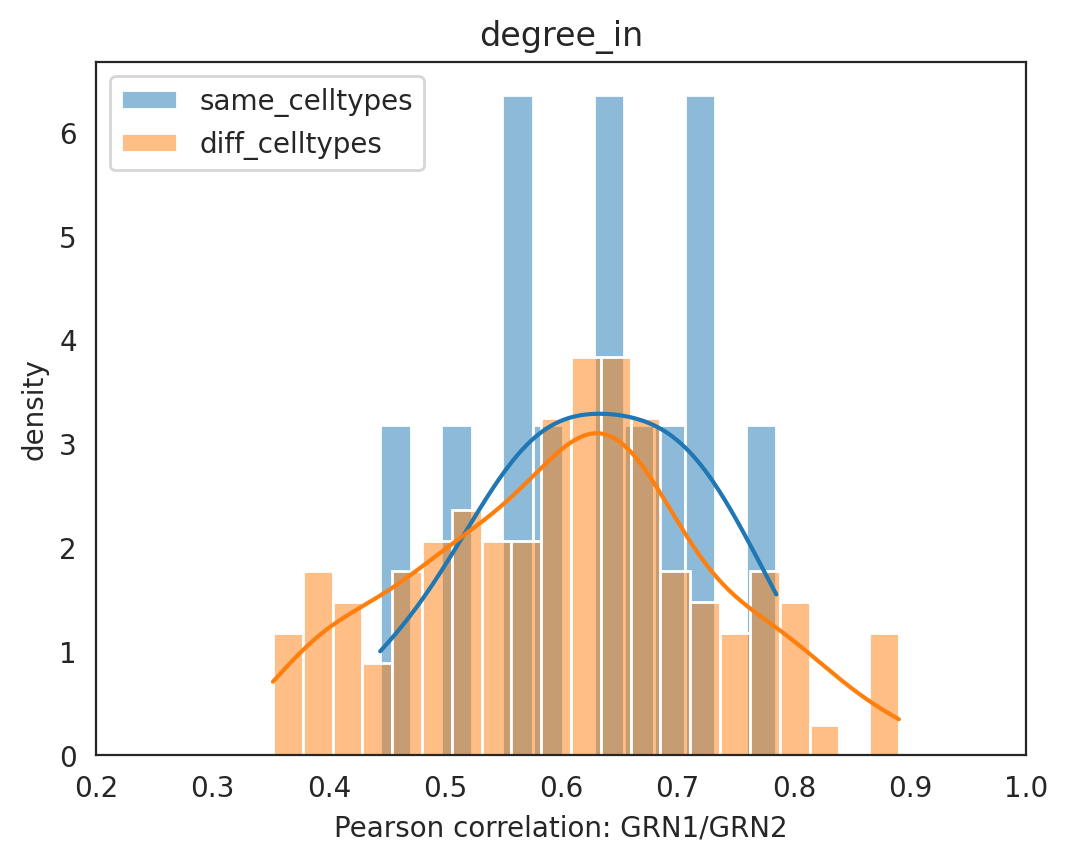

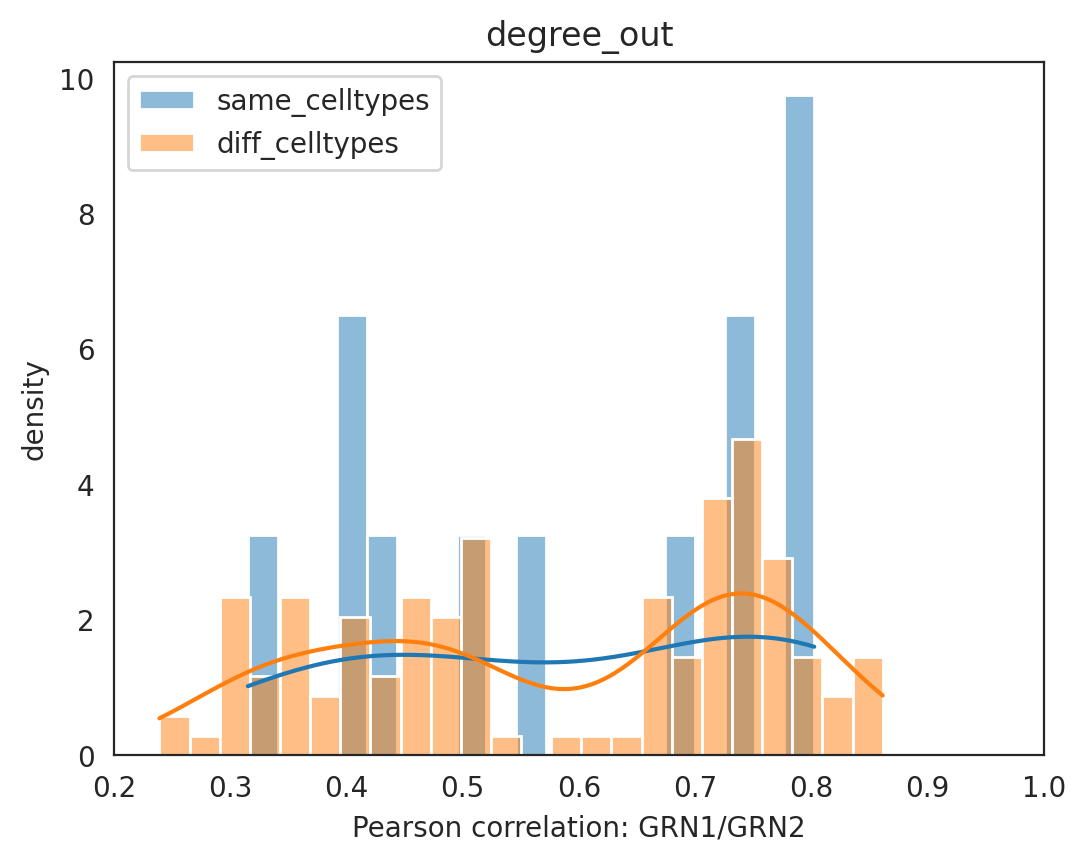

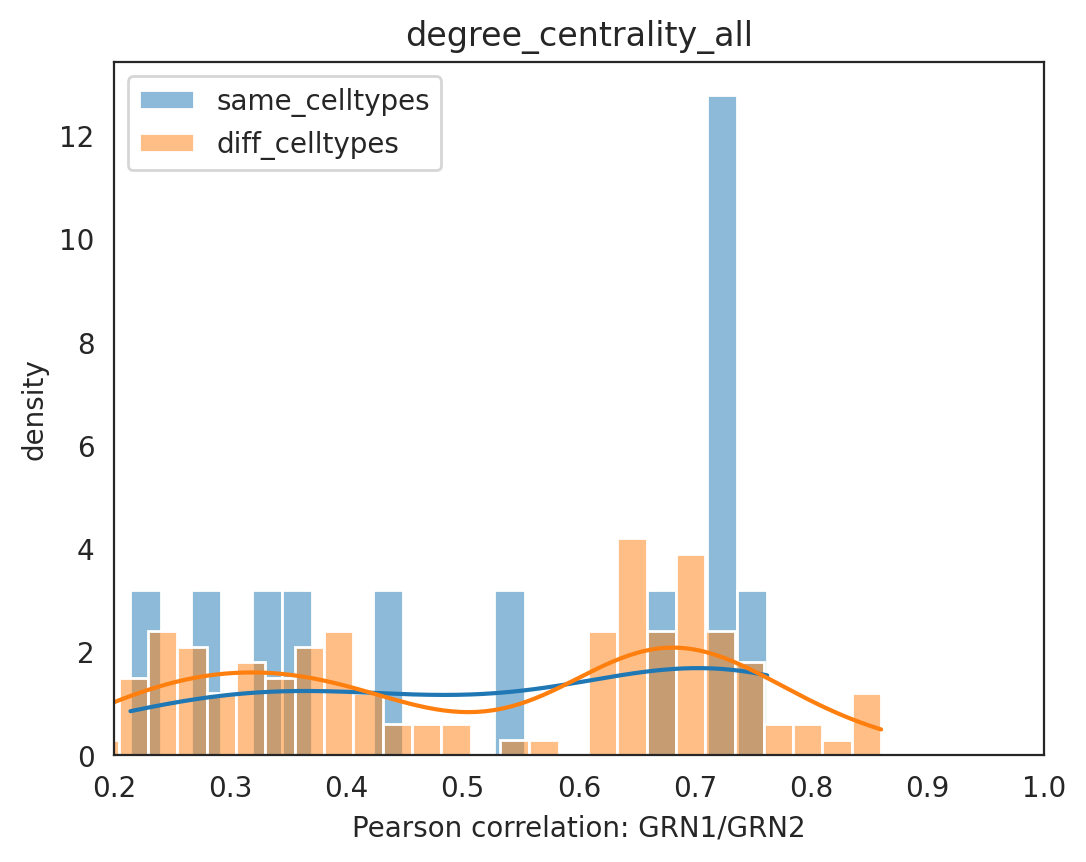

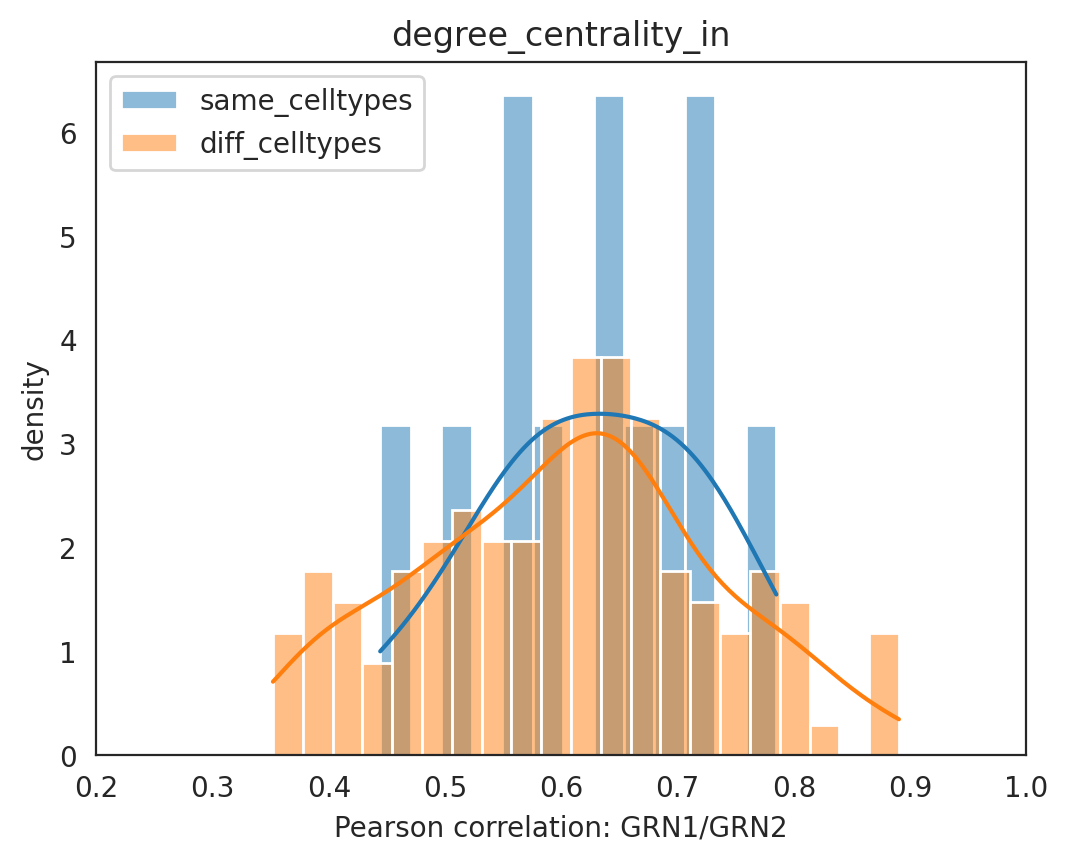

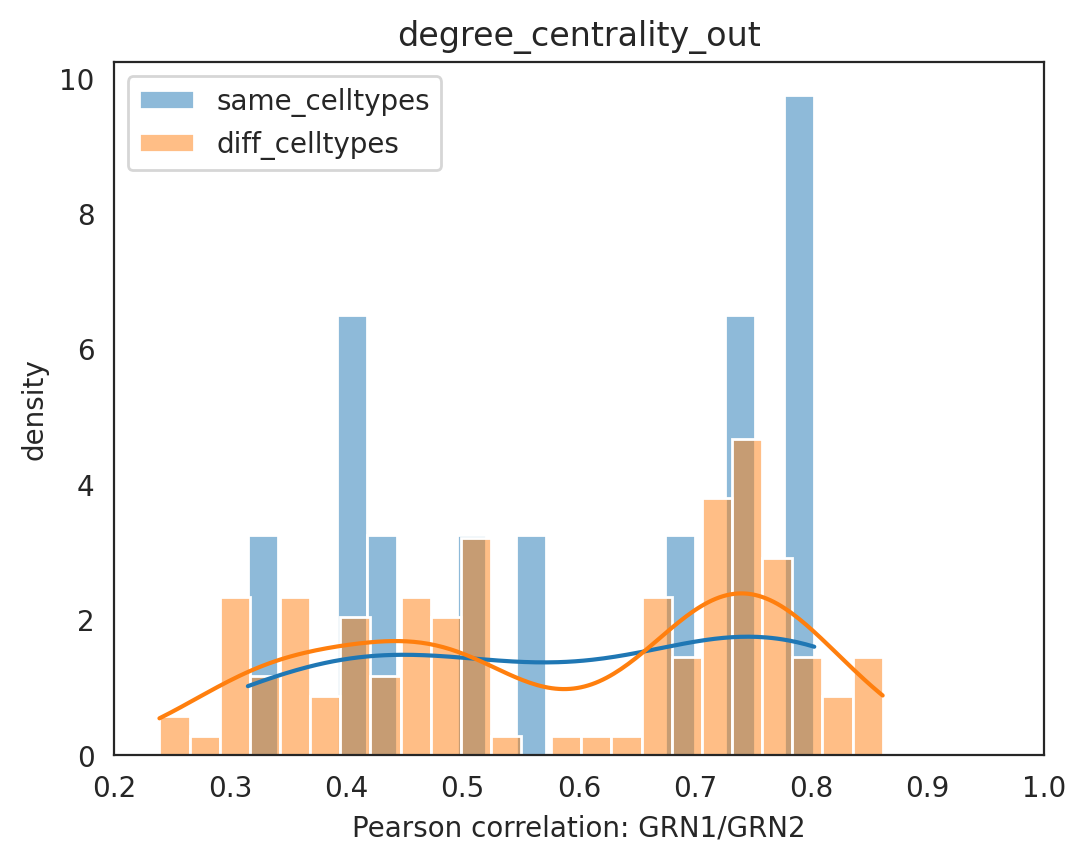

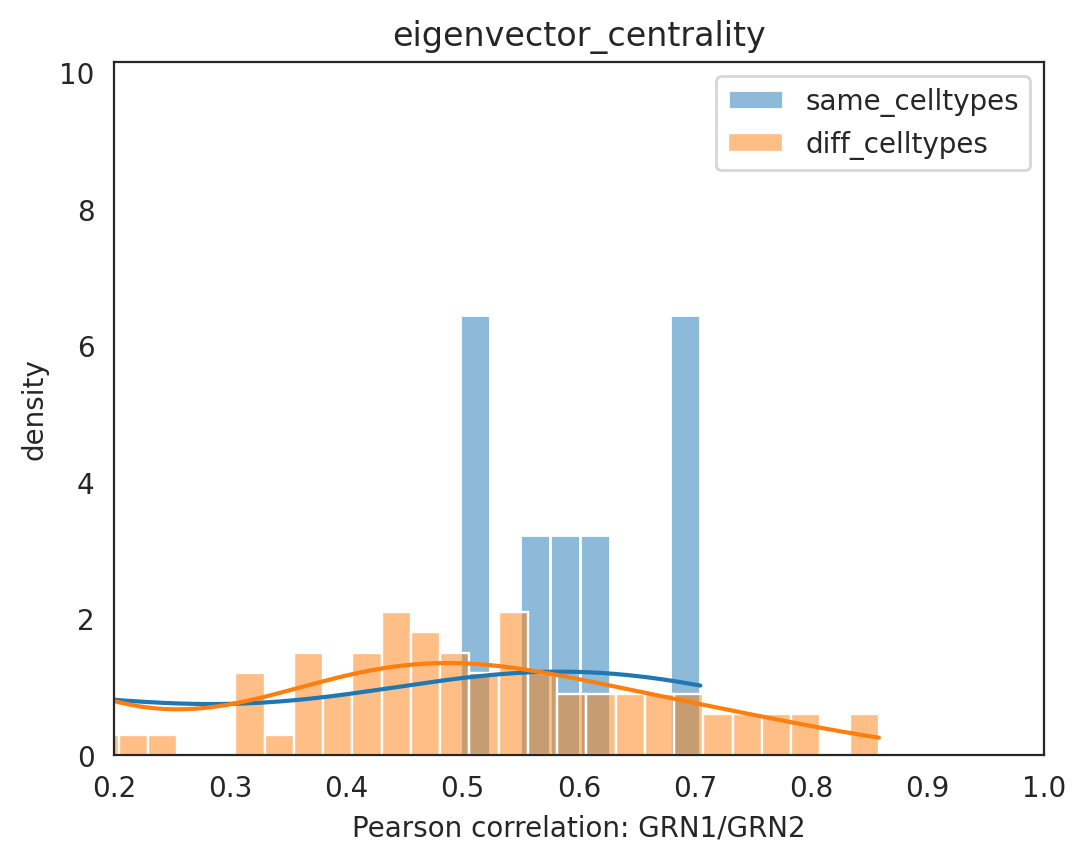

In [78]:
# define the cell-types
# celltypes = ['Adaxial_Cells', 'Differentiating_Neurons', 'Endoderm',
#        'Epidermal', 'Lateral_Mesoderm', 'Muscle', 'NMPs',
#        'Neural_Anterior', 'Neural_Crest', 'Neural_Posterior', 'Notochord',
#        'PSM', 'Somites']
celltypes = set(TDR126_GRN.links_dict.keys()).intersection(TDR118_GRN.links_dict.keys())
celltypes.remove("unassigned")
celltypes

# define the degree_metrics
degree_metrics = ["degree_all","degree_in","degree_out",
                  "degree_centrality_all","degree_centrality_in",
                  "degree_centrality_out","eigenvector_centrality"]

# define an empty dictionary to save the list of corr.coeff (per metric)
dict_corr_coeff = {}
# dict_corr_coeff["degree_centrality_all_same"] = corr_same_celltypes
# dict_corr_coeff['degree_centrality_all_diff'] = corr_diff_celltypes

# For loop to go over all degree metrics
for metric in degree_metrics:
    # define empty series to save the correlation coefficients
    corr_same_celltypes =[]
    corr_diff_celltypes = []

    for ct1 in celltypes:
        for ct2 in celltypes:
            corr_coeff = compute_corr_betwn_GRNs(df_GRN1, df_GRN2, ct1, ct2, metric)

            if ct1==ct2:
                corr_same_celltypes.append(corr_coeff)
            else:
                corr_diff_celltypes.append(corr_coeff)
                
    # define the keys for the dictionary
    namekey_same = metric + "_same"
    namekey_diff = metric + "_diff"
    # save the corr.coeff. into the dictionary
    dict_corr_coeff[namekey_same] = corr_same_celltypes
    dict_corr_coeff[namekey_diff] = corr_diff_celltypes
    
    # generate plots (optional)
    # define the bin width
    bin_width = 0.025

    # Calculate the number of bins for each histogram
    num_bins1 = int((max(corr_same_celltypes) - min(corr_same_celltypes)) / bin_width)
    num_bins2 = int((max(corr_diff_celltypes) - min(corr_diff_celltypes)) / bin_width)

    plt.figure()
    sns.histplot(corr_same_celltypes, kde=True, bins=num_bins1, stat="density", label='same_celltypes')
    sns.histplot(corr_diff_celltypes, kde=True, bins=num_bins2, stat="density", label='diff_celltypes')
    plt.xlim([0.2, 1])
    plt.xlabel("Pearson correlation: GRN1/GRN2")
    plt.ylabel("density")
    plt.title(metric)
    plt.legend()

    #plt.savefig("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/zebrahub-multiome-analysis/figures/network_plots_TDR118/QC_corr_centrality_TDR118_TDR119_allCelltypes.pdf")
    plt.savefig(figpath + "QC_corr_" + metric + "_TDR118_TDR126_15somites_0somites_allCelltypes.pdf")
    plt.savefig(figpath + "QC_corr_" + metric + "_TDR118_TDR126_15somites_0somites_allCelltypes.png")
    plt.show()

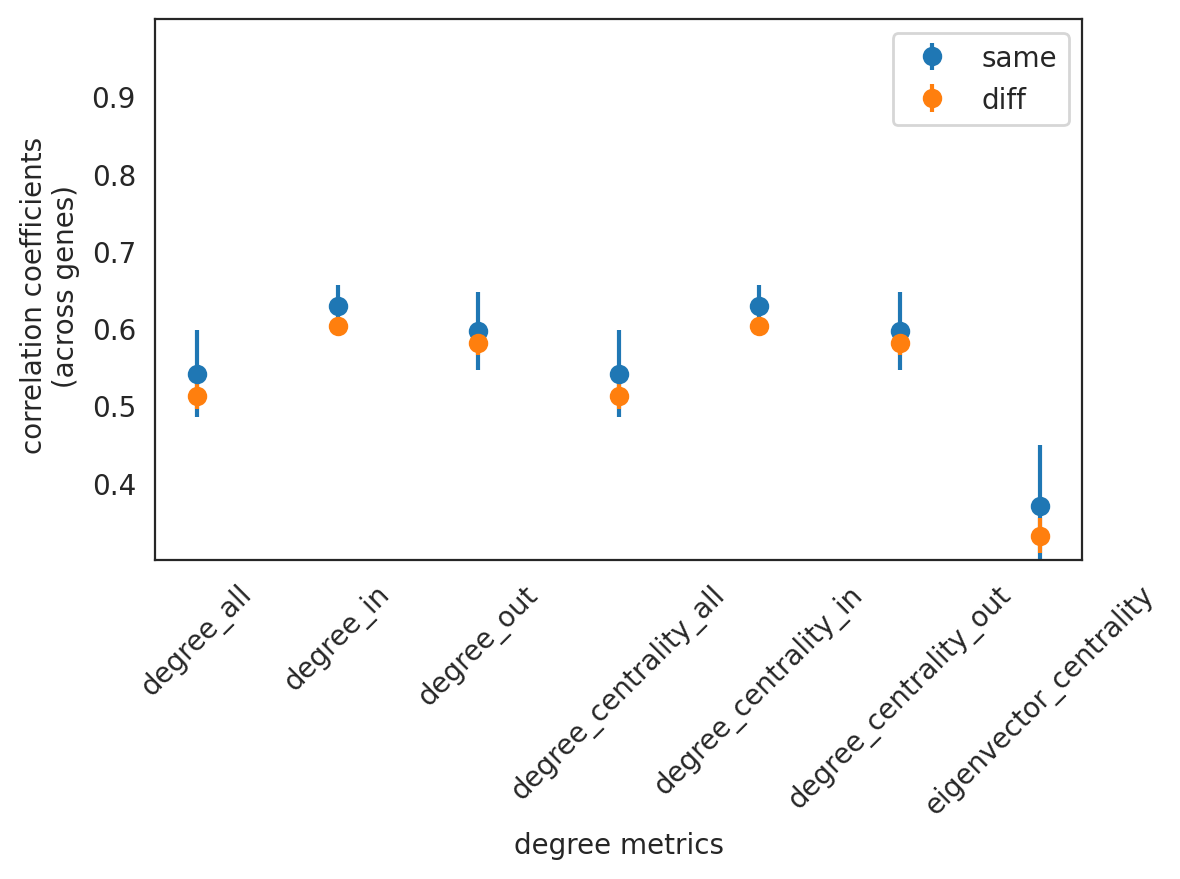

In [71]:
# A dictionary that has the distributions of corr.coeff., from all metrics
data = dict_corr_coeff
metric_names = degree_metrics

# Extract metric names and categories
# metric_names = list(set(key.split('_')[0] for key in data.keys()))
categories = ['same', 'diff']

# Compute means and standard errors for each metric and category
means = {}
std_errors = {}
for metric in metric_names:
    means[metric] = [np.mean(data[f'{metric}_{category}']) for category in categories]
    std_errors[metric] = [np.std(data[f'{metric}_{category}']) / np.sqrt(len(data[f'{metric}_{category}'])) for category in categories]

# Create x-values for each metric
x_values = np.arange(len(metric_names))

# Create a scatter plot with grouped data points and error bars
fig, ax = plt.subplots()

for i, category in enumerate(categories):
    y_values = [np.mean(data[f'{metric}_{category}']) for metric in metric_names]
    error_bar = [np.std(data[f'{metric}_{category}']) / np.sqrt(len(data[f'{metric}_{category}'])) for metric in metric_names]
    ax.errorbar(x_values, y_values, yerr=error_bar, marker='o', linestyle='None', label=category)

ax.set_xlabel('degree metrics')
ax.set_ylabel('correlation coefficients \n (across genes)')
# ax.set_title('Mean Value with Standard Error (Grouped Scatter Plot with Error Bars)')
ax.set_xticks(x_values)
ax.set_yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
ax.set_ylim([0.3, 1])
ax.set_xticklabels(metric_names, rotation = 45)
ax.legend(loc="upper right")

plt.tight_layout()
plt.savefig(figpath + "corr_coeff_TDR118_TDR126_15somites_0somites_all_degree_metrics.pdf")
plt.savefig(figpath + "corr_coeff_TDR118_TDR126_15somites_0somites_all_degree_metrics.png")
plt.show()

### TDR118 vs TDR124 (15 somites vs 30 somites)

In [79]:
# First, (15 somites, 0 somites) = (TDR118, TDR126)
df_GRN1 = TDR118_GRN.merged_score
df_GRN2 = TDR124_GRN.merged_score

In [80]:
# define a dictionary to save all the corr.coeff results
dict_corr_coeff = {}
dict_corr_coeff["degree_centrality_all_same"] = corr_same_celltypes
dict_corr_coeff['degree_centrality_all_diff'] = corr_diff_celltypes

In [88]:
# celltypes = set(TDR124_GRN.links_dict.keys()).intersection(TDR118_GRN.links_dict.keys())
# celltypes.remove("unassigned")
# celltypes

{'Adaxial_Cells',
 'Differentiating_Neurons',
 'Endoderm',
 'Epidermal',
 'Muscle',
 'Neural_Anterior',
 'Neural_Crest',
 'Neural_Posterior',
 'Notochord',
 'PSM',
 'Somites'}

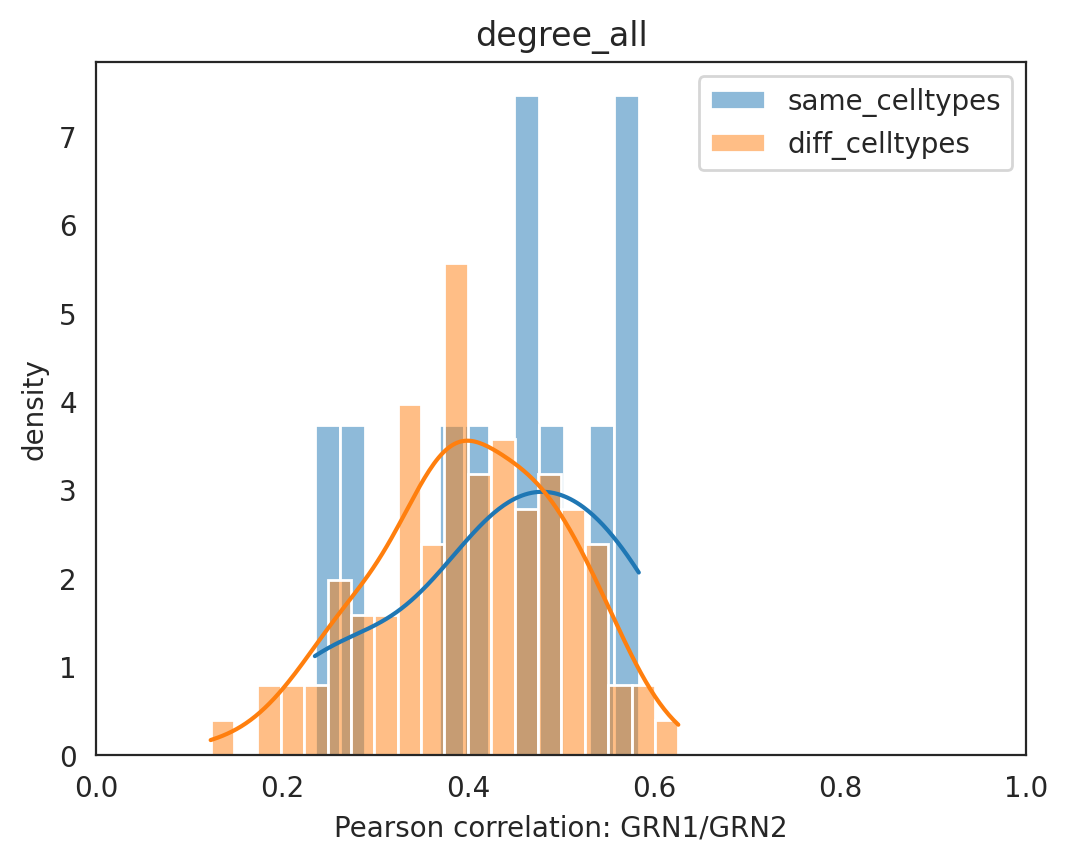

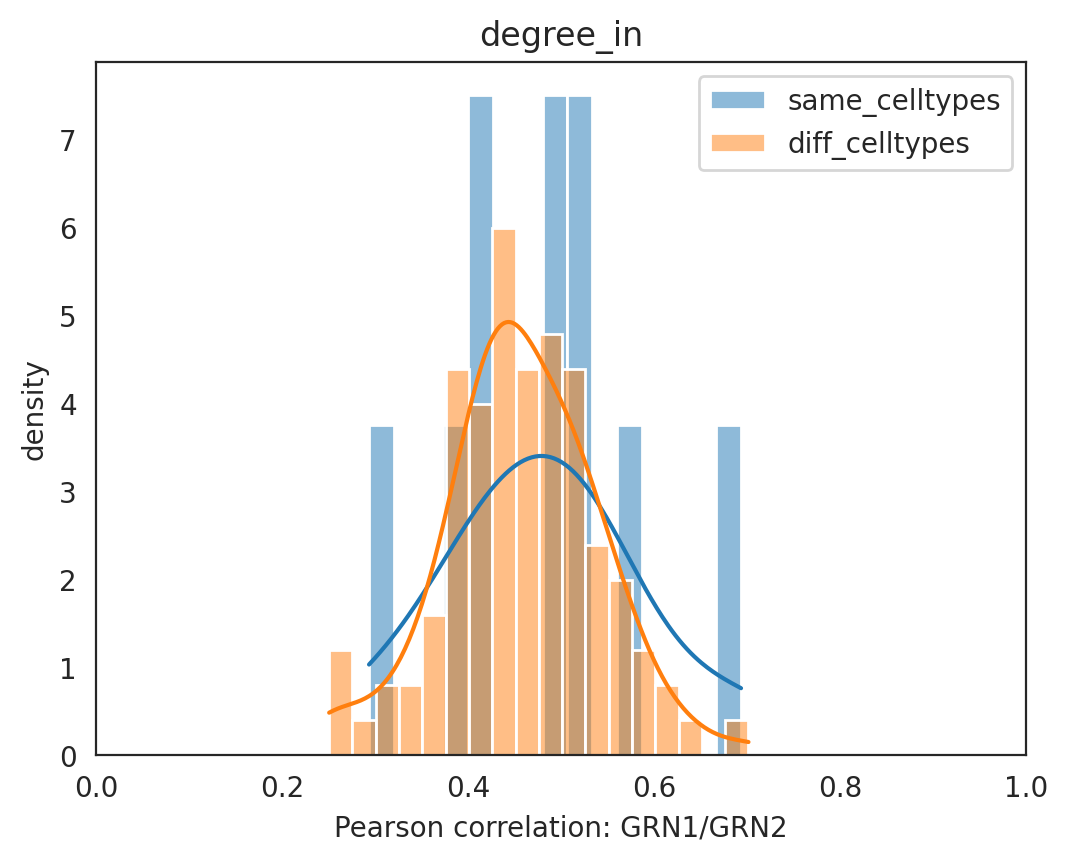

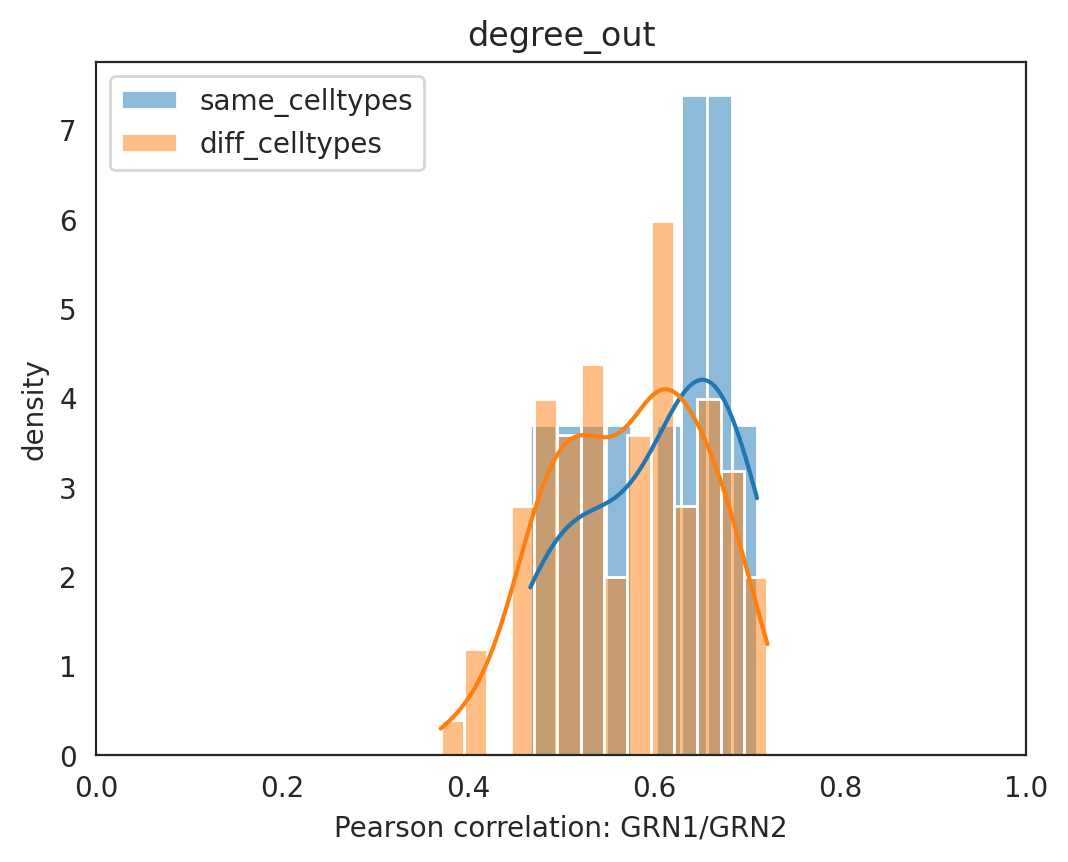

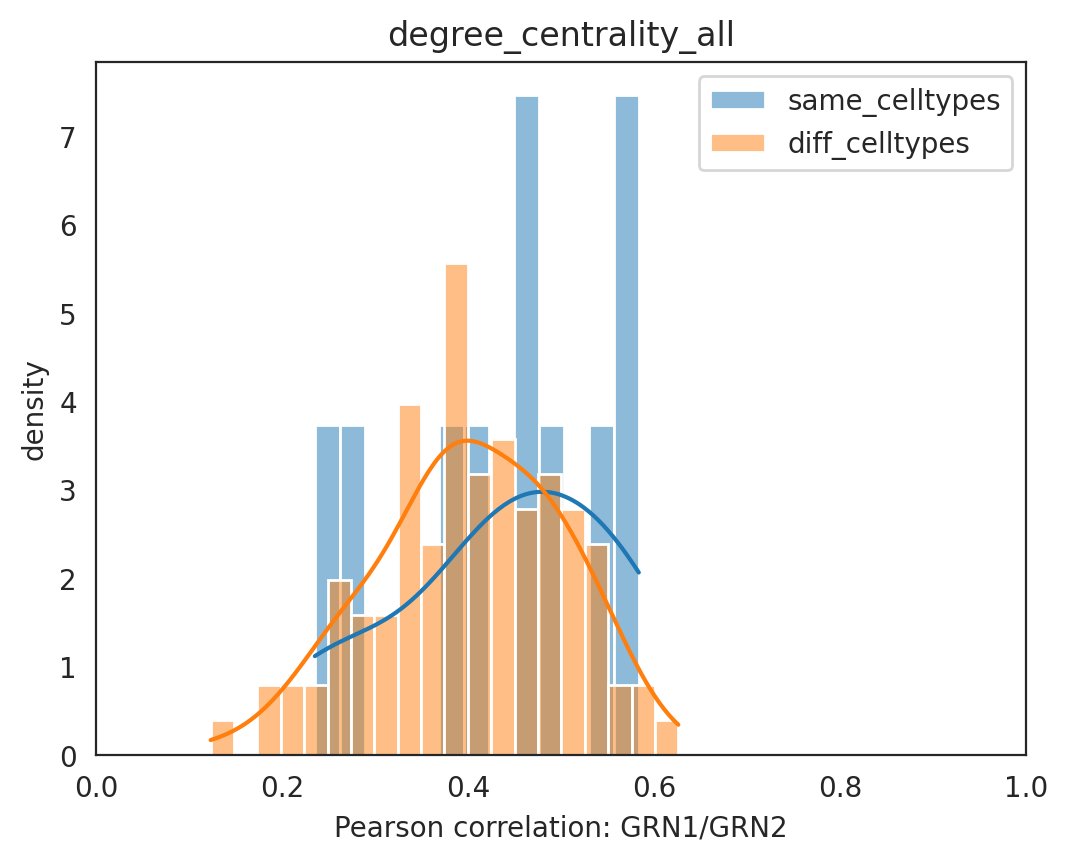

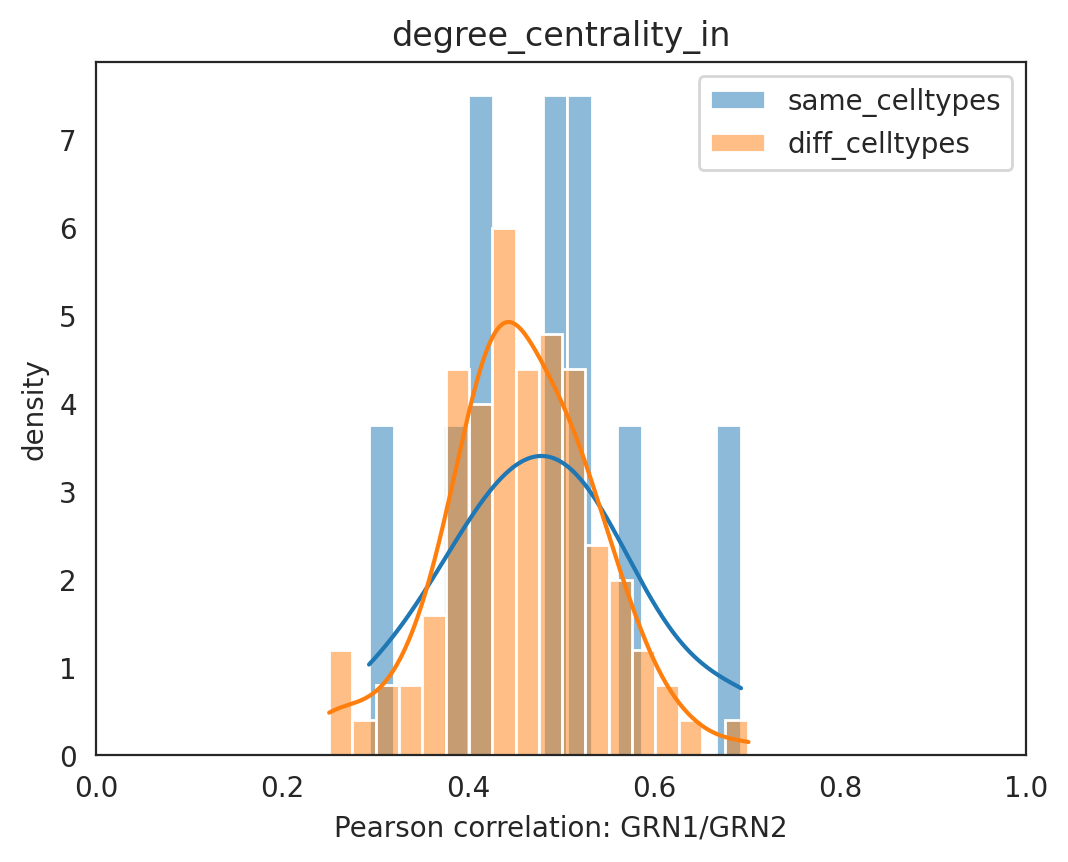

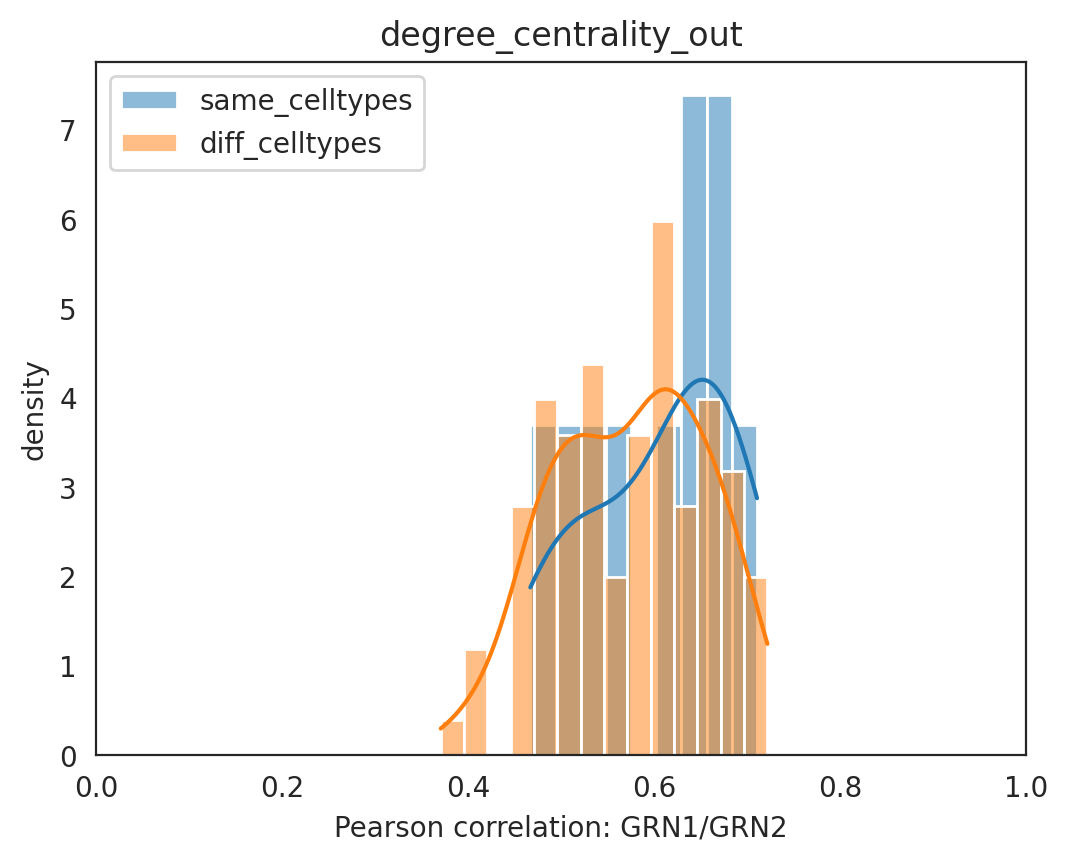

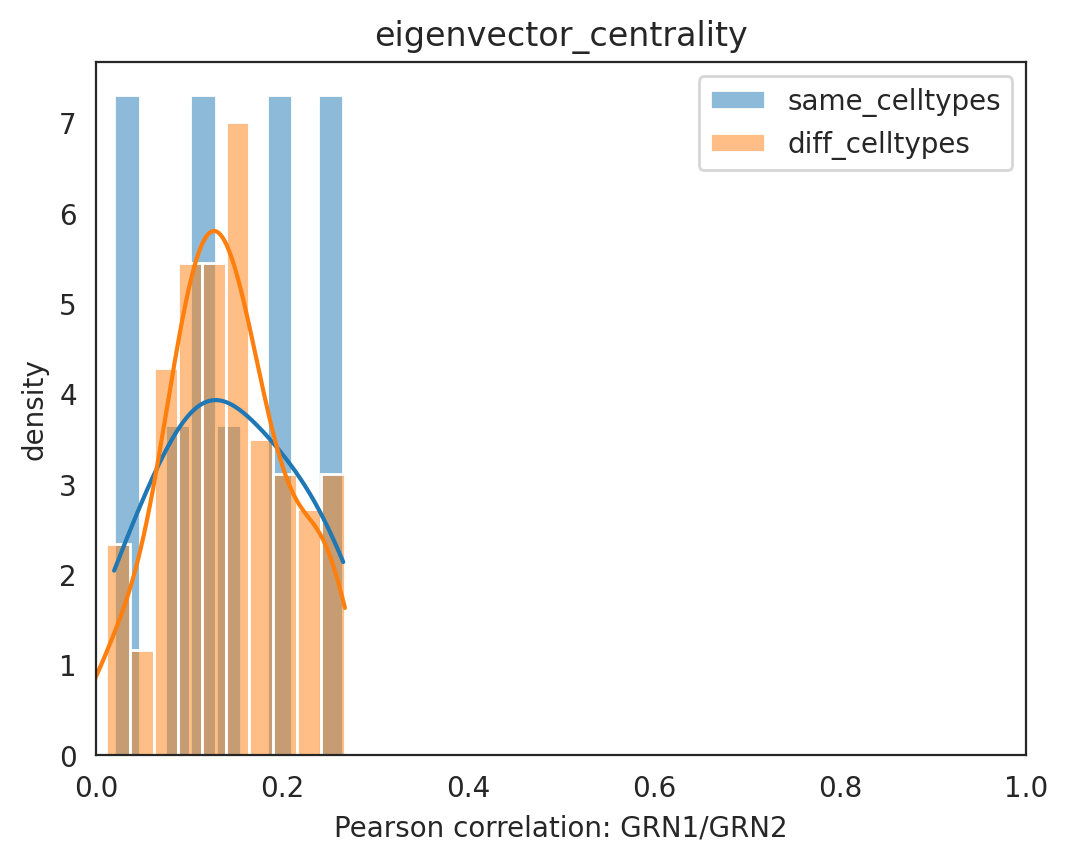

In [89]:
# define the cell-types
# celltypes = ['Adaxial_Cells', 'Differentiating_Neurons', 'Endoderm',
#        'Epidermal', 'Lateral_Mesoderm', 'Muscle', 'NMPs',
#        'Neural_Anterior', 'Neural_Crest', 'Neural_Posterior', 'Notochord',
#        'PSM', 'Somites']
celltypes = set(TDR124_GRN.links_dict.keys()).intersection(TDR118_GRN.links_dict.keys())
celltypes.remove("unassigned")
celltypes

# define the degree_metrics
degree_metrics = ["degree_all","degree_in","degree_out",
                  "degree_centrality_all","degree_centrality_in",
                  "degree_centrality_out","eigenvector_centrality"]

# define an empty dictionary to save the list of corr.coeff (per metric)
dict_corr_coeff = {}
# dict_corr_coeff["degree_centrality_all_same"] = corr_same_celltypes
# dict_corr_coeff['degree_centrality_all_diff'] = corr_diff_celltypes

# For loop to go over all degree metrics
for metric in degree_metrics:
    # define empty series to save the correlation coefficients
    corr_same_celltypes =[]
    corr_diff_celltypes = []

    for ct1 in celltypes:
        for ct2 in celltypes:
            corr_coeff = compute_corr_betwn_GRNs(df_GRN1, df_GRN2, ct1, ct2, metric)

            if ct1==ct2:
                corr_same_celltypes.append(corr_coeff)
            else:
                corr_diff_celltypes.append(corr_coeff)
                
    # define the keys for the dictionary
    namekey_same = metric + "_same"
    namekey_diff = metric + "_diff"
    # save the corr.coeff. into the dictionary
    dict_corr_coeff[namekey_same] = corr_same_celltypes
    dict_corr_coeff[namekey_diff] = corr_diff_celltypes
    
    # generate plots (optional)
    # define the bin width
    bin_width = 0.025

    # Calculate the number of bins for each histogram
    num_bins1 = int((max(corr_same_celltypes) - min(corr_same_celltypes)) / bin_width)
    num_bins2 = int((max(corr_diff_celltypes) - min(corr_diff_celltypes)) / bin_width)

    plt.figure()
    sns.histplot(corr_same_celltypes, kde=True, bins=num_bins1, stat="density", label='same_celltypes')
    sns.histplot(corr_diff_celltypes, kde=True, bins=num_bins2, stat="density", label='diff_celltypes')
    plt.xlim([0, 1])
    plt.xlabel("Pearson correlation: GRN1/GRN2")
    plt.ylabel("density")
    plt.title(metric)
    plt.legend()

    #plt.savefig("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/zebrahub-multiome-analysis/figures/network_plots_TDR118/QC_corr_centrality_TDR118_TDR119_allCelltypes.pdf")
    plt.savefig(figpath + "QC_corr_" + metric + "_TDR118_TDR124_15somites_30somites_allCelltypes.pdf")
    plt.savefig(figpath + "QC_corr_" + metric + "_TDR118_TDR124_15somites_30somites_allCelltypes.png")
    plt.show()

In [92]:
degree_metrics

['degree_all',
 'degree_in',
 'degree_out',
 'degree_centrality_all',
 'degree_centrality_in',
 'degree_centrality_out',
 'eigenvector_centrality']

In [95]:
data.keys()

dict_keys(['degree_all_same', 'degree_all_diff', 'degree_in_same', 'degree_in_diff', 'degree_out_same', 'degree_out_diff', 'degree_centrality_all_same', 'degree_centrality_all_diff', 'degree_centrality_in_same', 'degree_centrality_in_diff', 'degree_centrality_out_same', 'degree_centrality_out_diff', 'eigenvector_centrality_same', 'eigenvector_centrality_diff'])

In [96]:
data["degree_all_same"]

[0.40221650714924984,
 0.46288359394857886,
 0.5833080051423836,
 0.5409593033254695,
 0.3909710500820791,
 0.4914050103037366,
 nan,
 0.4494854584377837,
 0.569643688369934,
 0.2350289586372188,
 0.2736738418506756]

In [99]:
celltypes

{'Adaxial_Cells',
 'Differentiating_Neurons',
 'Endoderm',
 'Epidermal',
 'Muscle',
 'Neural_Anterior',
 'Neural_Crest',
 'Neural_Posterior',
 'Notochord',
 'PSM',
 'Somites'}

In [111]:
df_GRN1[df_GRN1.cluster=="PSM"]

,degree_all,degree_in,degree_out,clustering_coefficient,clustering_coefficient_weighted,degree_centrality_all,degree_centrality_in,degree_centrality_out,betweenness_centrality,closeness_centrality,eigenvector_centrality,page_rank,assortative_coefficient,average_path_length,community_random_walk,module,connectivity,participation,role,cluster
foxd2,9,0,9,0.000000,0.000000,0.016822,0.000000,0.016822,0,1.264233,0.150443,0.001239,-0.118527,0.133438,19,3,0.308022,0.567901,Peripheral,PSM
foxi2,6,0,6,0.133333,0.045761,0.011215,0.000000,0.011215,0,0.020186,0.130851,0.001239,-0.118527,0.133438,19,3,0.056798,0.500000,Peripheral,PSM
foxd1,12,0,12,0.030303,0.013780,0.022430,0.000000,0.022430,0,0.029036,0.153031,0.001239,-0.118527,0.133438,19,3,1.564139,0.291667,Peripheral,PSM
foxf2a,1,0,1,0.000000,0.000000,0.001869,0.000000,0.001869,0,5.127176,0.041779,0.001239,-0.118527,0.133438,19,3,-0.696872,0.000000,Ultra peripheral,PSM
nfatc3a,6,0,6,0.000000,0.000000,0.011215,0.000000,0.011215,0,3.250339,0.011311,0.001239,-0.118527,0.133438,17,3,0.056798,0.444444,Peripheral,PSM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dla,1,1,0,0.000000,0.000000,0.001869,0.001869,0.000000,0,NaN,0.000664,0.001366,-0.118527,0.133438,46,3,-0.696872,0.000000,Ultra peripheral,PSM
rn7sk,1,1,0,0.000000,0.000000,0.001869,0.001869,0.000000,0,NaN,0.000427,0.001404,-0.118527,0.133438,47,4,-0.532965,0.000000,Ultra peripheral,PSM
grip1,1,1,0,0.000000,0.000000,0.001869,0.001869,0.000000,0,NaN,0.003244,0.001330,-0.118527,0.133438,48,2,-0.726661,0.000000,Ultra peripheral,PSM
ube2c,1,1,0,0.000000,0.000000,0.001869,0.001869,0.000000,0,NaN,0.001092,0.001319,-0.118527,0.133438,49,4,-0.532965,0.000000,Ultra peripheral,PSM


Text(0.1, 0.9, 'Pearson Correlation: nan')

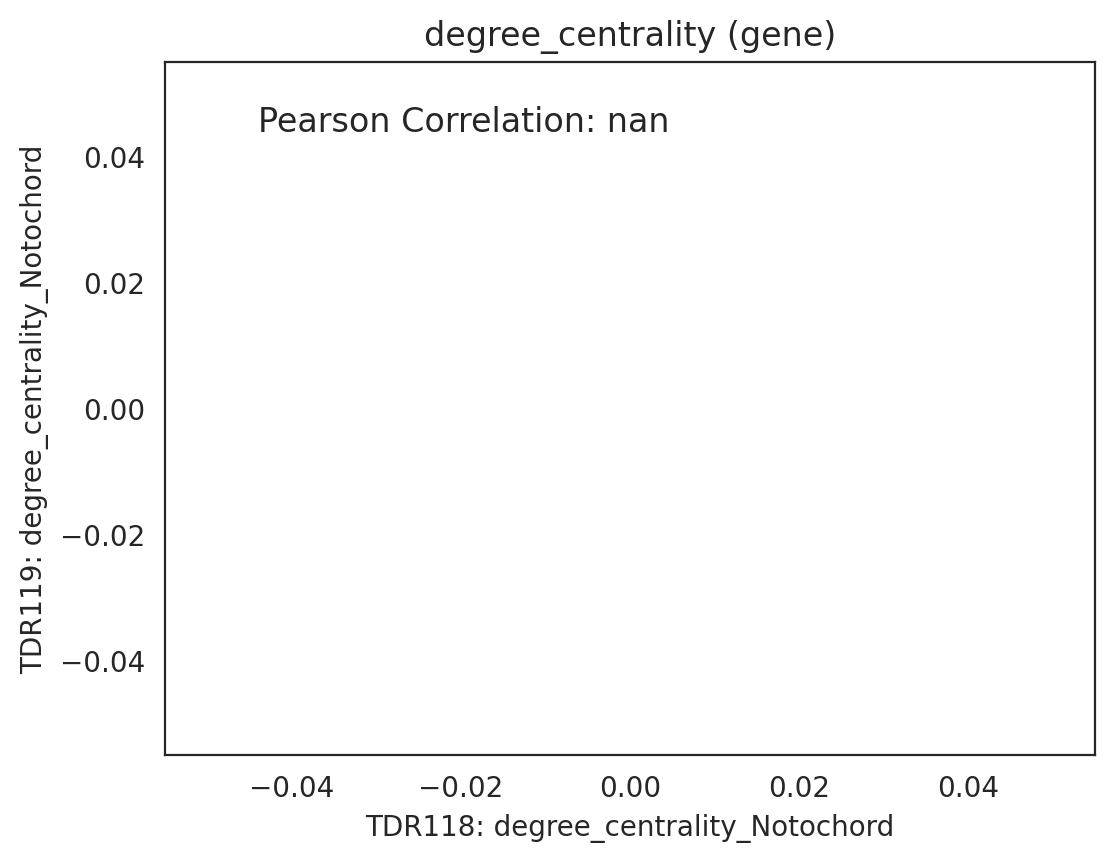

In [108]:
# Check the correlation of "degree_centrality_all" metric 
# per gene between the same cell-types

# subset the dataframes for specific cell-type
celltype1 = "Notochord"
celltype2 = "Notochord"

df1 = df_GRN1[df_GRN1.cluster==celltype1]
df2 = df_GRN2[df_GRN2.cluster==celltype2]

# Step 1. Get a union of gene_names
gene_names = set(df1.index).union(df2.index)
len(gene_names)

# Step 2. Create a new dataframe with matching indices
new_df1 = df1[df1.index.isin(gene_names)]
new_df2 = df2[df2.index.isin(gene_names)]

# Step 3. Fill missing values with NaNs
new_df1 = new_df1.reindex(gene_names) #fill_value=0
new_df2 = new_df2.reindex(gene_names)

# Step 4. Create the zipped DataFrame
zipped_df = pd.DataFrame({'degree_centrality_all_df1': new_df1['degree_centrality_all'], 'degree_centrality_all_df2': new_df2['degree_centrality_all']})
zipped_df

# Step 5. Generate scatter plots, with Pearson correlation coeff.
plt.scatter(x=zipped_df.degree_centrality_all_df1,
            y=zipped_df.degree_centrality_all_df2)
plt.xlabel("TDR118: degree_centrality_" + celltype1)
plt.ylabel("TDR119: degree_centrality_" + celltype2)
plt.title("degree_centrality (gene)")


# Annotate the plot with the correlation coefficient
corr = zipped_df.degree_centrality_all_df1.corr(zipped_df.degree_centrality_all_df2,
                                                method = "pearson")
plt.annotate(f"Pearson Correlation: {corr:.2f}",
             xy=(0.1, 0.9), xycoords='axes fraction', fontsize=12)

StopIteration: 

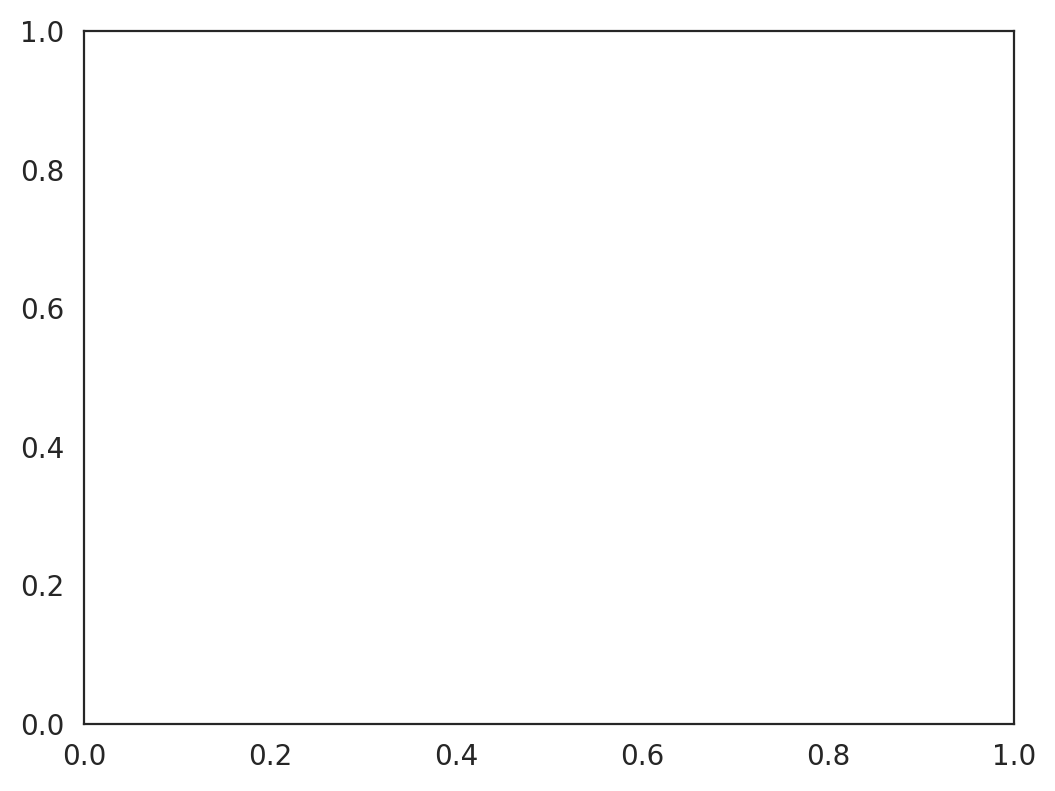

In [86]:
# A dictionary that has the distributions of corr.coeff., from all metrics
data = dict_corr_coeff
metric_names = degree_metrics

# Extract metric names and categories
# metric_names = list(set(key.split('_')[0] for key in data.keys()))
categories = ['same', 'diff']

# Compute means and standard errors for each metric and category
means = {}
std_errors = {}
for metric in metric_names:
    means[metric] = [np.mean(data[f'{metric}_{category}']) for category in categories]
    std_errors[metric] = [np.std(data[f'{metric}_{category}']) / np.sqrt(len(data[f'{metric}_{category}'])) for category in categories]

# Create x-values for each metric
x_values = np.arange(len(metric_names))

# Create a scatter plot with grouped data points and error bars
fig, ax = plt.subplots()

for i, category in enumerate(categories):
    y_values = [np.mean(data[f'{metric}_{category}']) for metric in metric_names]
    error_bar = [np.std(data[f'{metric}_{category}']) / np.sqrt(len(data[f'{metric}_{category}'])) for metric in metric_names]
    ax.errorbar(x_values, y_values, yerr=error_bar, marker='o', linestyle='None', label=category)

ax.set_xlabel('degree metrics')
ax.set_ylabel('correlation coefficients \n (across genes)')
# ax.set_title('Mean Value with Standard Error (Grouped Scatter Plot with Error Bars)')
ax.set_xticks(x_values)
ax.set_yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
ax.set_ylim([0.3, 1])
ax.set_xticklabels(metric_names, rotation = 45)
ax.legend(loc="upper right")

plt.tight_layout()
plt.savefig(figpath + "corr_coeff_TDR118_TDR124_15somites_30somites_all_degree_metrics.pdf")
plt.savefig(figpath + "corr_coeff_TDR118_TDR124_15somites_30somites_all_degree_metrics.png")
plt.show()

In [87]:
dict_corr_coeff

{'degree_all_same': [0.40221650714924984,
  0.46288359394857886,
  0.5833080051423836,
  0.5409593033254695,
  0.3909710500820791,
  0.4914050103037366,
  nan,
  0.4494854584377837,
  0.569643688369934,
  0.2350289586372188,
  0.2736738418506756],
 'degree_all_diff': [0.35836903354005706,
  0.40249658458508814,
  0.4091854674205967,
  0.2532693586473106,
  0.33326609011665154,
  nan,
  0.4063707897591292,
  0.3679953666591957,
  0.35618779458497735,
  0.30250190148371403,
  0.37519765168593244,
  0.49759302605398414,
  0.44304141260597774,
  0.20568274964845748,
  0.3770615768279209,
  nan,
  0.5057794834107693,
  0.4598130821410523,
  0.39523884172829027,
  0.24360488899965377,
  0.4668259101464659,
  0.32877926680206637,
  0.5301526634713711,
  0.3406367250517737,
  0.4637730235298085,
  nan,
  0.4420760887657807,
  0.49868820812707215,
  0.4769458100428597,
  0.34432065187017885,
  0.44739479135482474,
  0.3952844398221728,
  0.5640868057972375,
  0.27971284702483734,
  0.4899337789